In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [89]:
df

Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
0     13500         23  46986    Diesel   90          0  2000      3   
1     13750         23  72937    Diesel   90          0  2000      3   
2     13950         24  41711    Diesel   90          0  2000      3   
3     14950         26  48000    Diesel   90          0  2000      3   
4     13750         30  38500    Diesel   90          0  2000      3   
...     ...        ...    ...       ...  ...        ...   ...    ...   
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
0             4      5    1165  
1             4      5    1165  
2             4      5    1165  
3             4      5    1165  
4             4      5    1170  
...         ...    ...     ...  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  

[1436 rows x 11 columns]

In [90]:
df.describe()

Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.188510    52.64112  
min     1300.00000     2.000000        4.0     3.000000  1000.00000  
25%     1400.00000     3.000000        4.0     5.000000  1040.00000  
50%     1600.00000     4.000000        4.0     5.000000  1070.00000  
75%     1600.00000     5.000000        4.0     5.000000  1085.00000  
max    16000.00000     5.000000        4.0     6.000000  1615.00000

In [91]:
df.describe(include = object)

Fuel_Type
count       1436
unique         3
top       Petrol
freq        1264

In [92]:
df['Age_08_04'].unique()

array([23, 24, 26, 30, 32, 27, 25, 22, 31, 28, 29, 20, 19, 16, 17, 11, 18,
       13, 14,  4,  8,  7, 15, 10, 12,  9,  6,  2,  1, 43, 38, 40, 44, 41,
       37, 39, 42, 35, 34, 33, 36, 53, 51, 54, 45, 55, 48, 52, 49, 56, 50,
       47, 46, 58, 68, 59, 62, 65, 67, 64, 60, 61, 66, 57, 63, 73, 79, 78,
       74, 77, 69, 80, 76, 70, 71, 75, 72])

In [93]:
df.drop(columns=['Cylinders','Automatic','Gears','Fuel_Type'], inplace=True)  #removed these columns as they were less dependent on y variable with less value in IQR itself with data set

In [94]:
df

Price  Age_08_04     KM   HP    cc  Doors  Weight
0     13500         23  46986   90  2000      3    1165
1     13750         23  72937   90  2000      3    1165
2     13950         24  41711   90  2000      3    1165
3     14950         26  48000   90  2000      3    1165
4     13750         30  38500   90  2000      3    1170
...     ...        ...    ...  ...   ...    ...     ...
1431   7500         69  20544   86  1300      3    1025
1432  10845         72  19000   86  1300      3    1015
1433   8500         71  17016   86  1300      3    1015
1434   7250         70  16916   86  1300      3    1015
1435   6950         76      1  110  1600      5    1114

[1436 rows x 7 columns]

In [95]:
df.duplicated().sum()

1

In [96]:
df.drop_duplicates(inplace=True) #removal of duplicate column

In [97]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
HP           0
cc           0
Doors        0
Weight       0
dtype: int64

<Axes: >

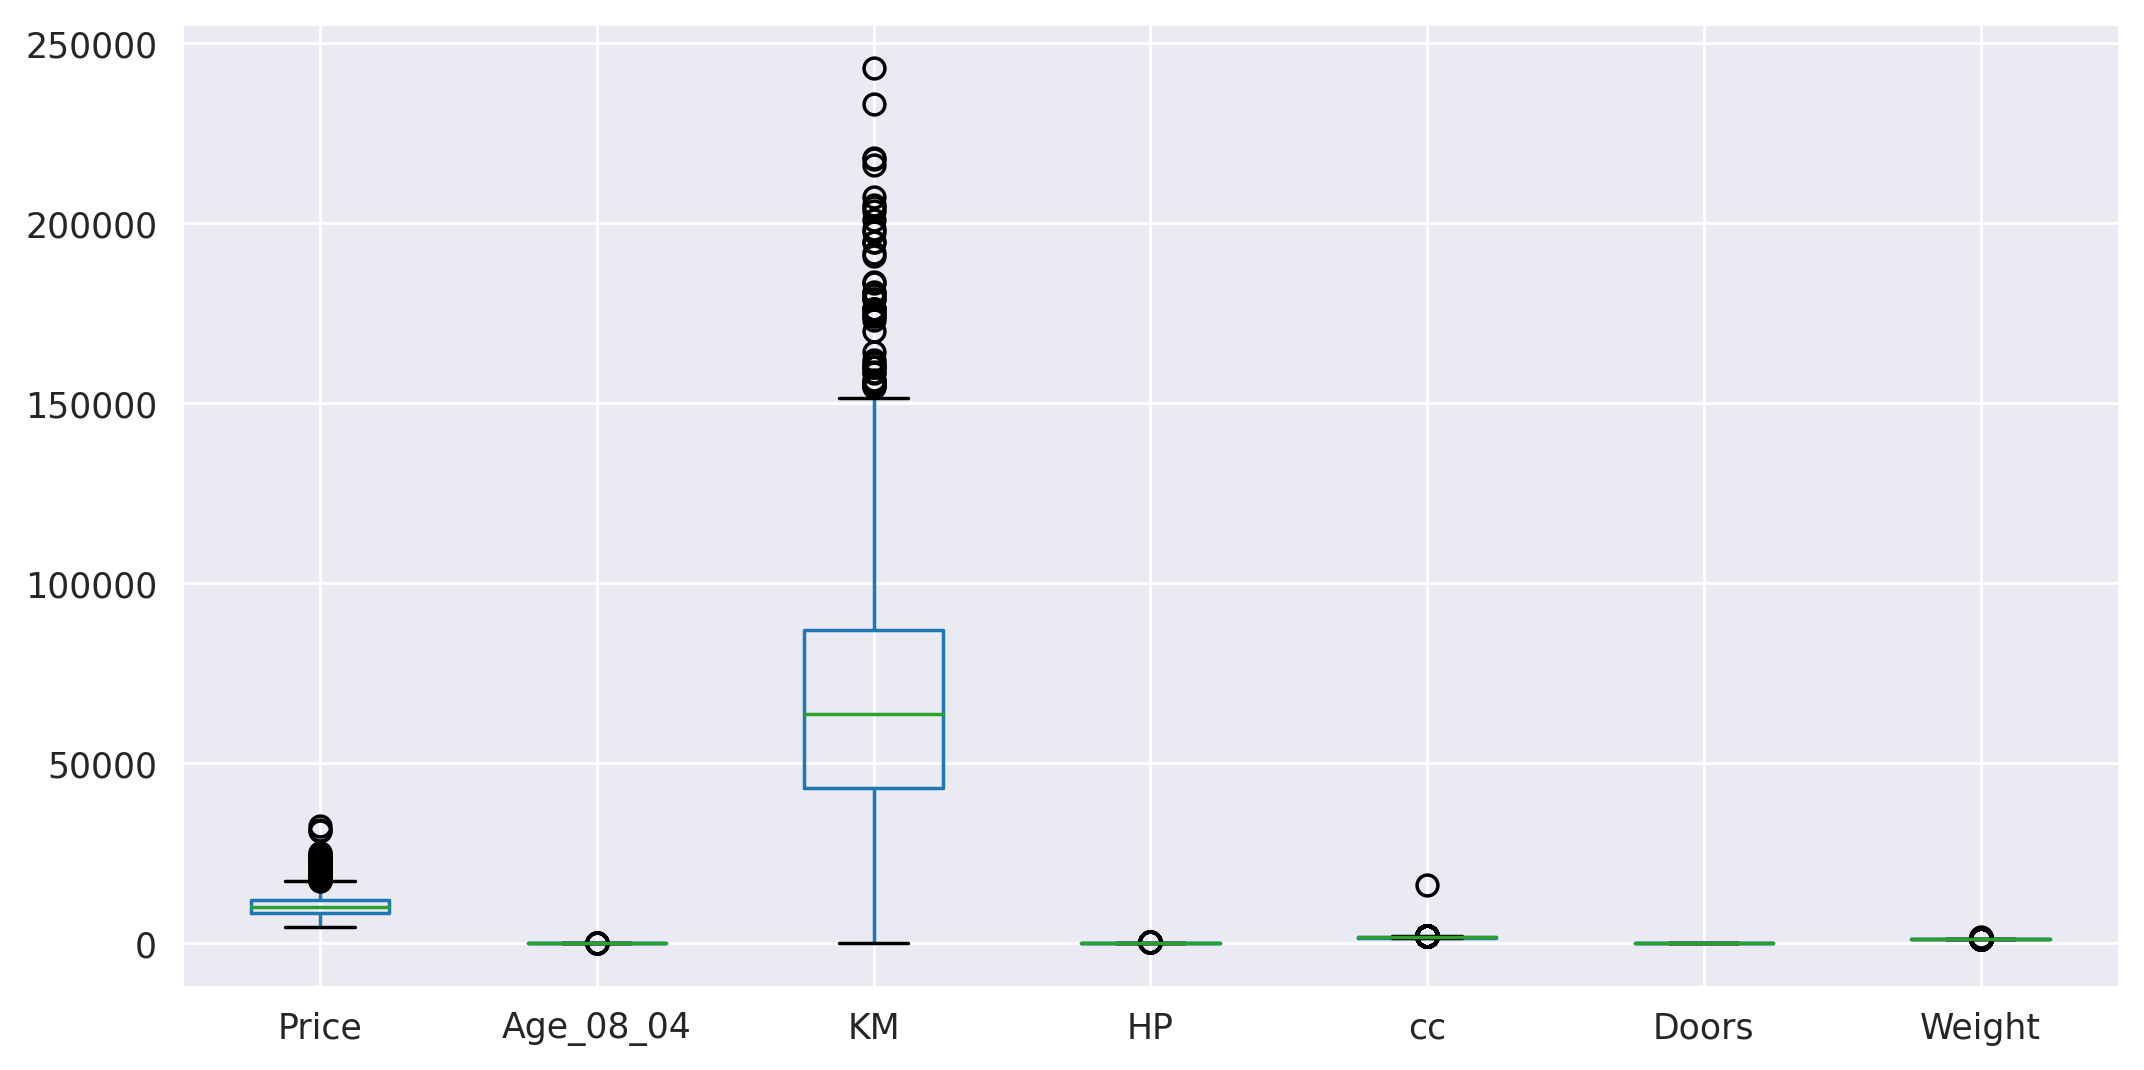

In [98]:
df.boxplot()    #outliers in almost everyone

In [99]:
def outlier_detection(data,colname):   #user defined function to treat outliers
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme

In [100]:
outlier_detection(df,"Price")

(3200.0, 17200.0)

In [101]:
df.loc[df['Price']>17200.0,'Price']=17200

<Axes: xlabel='cc'>

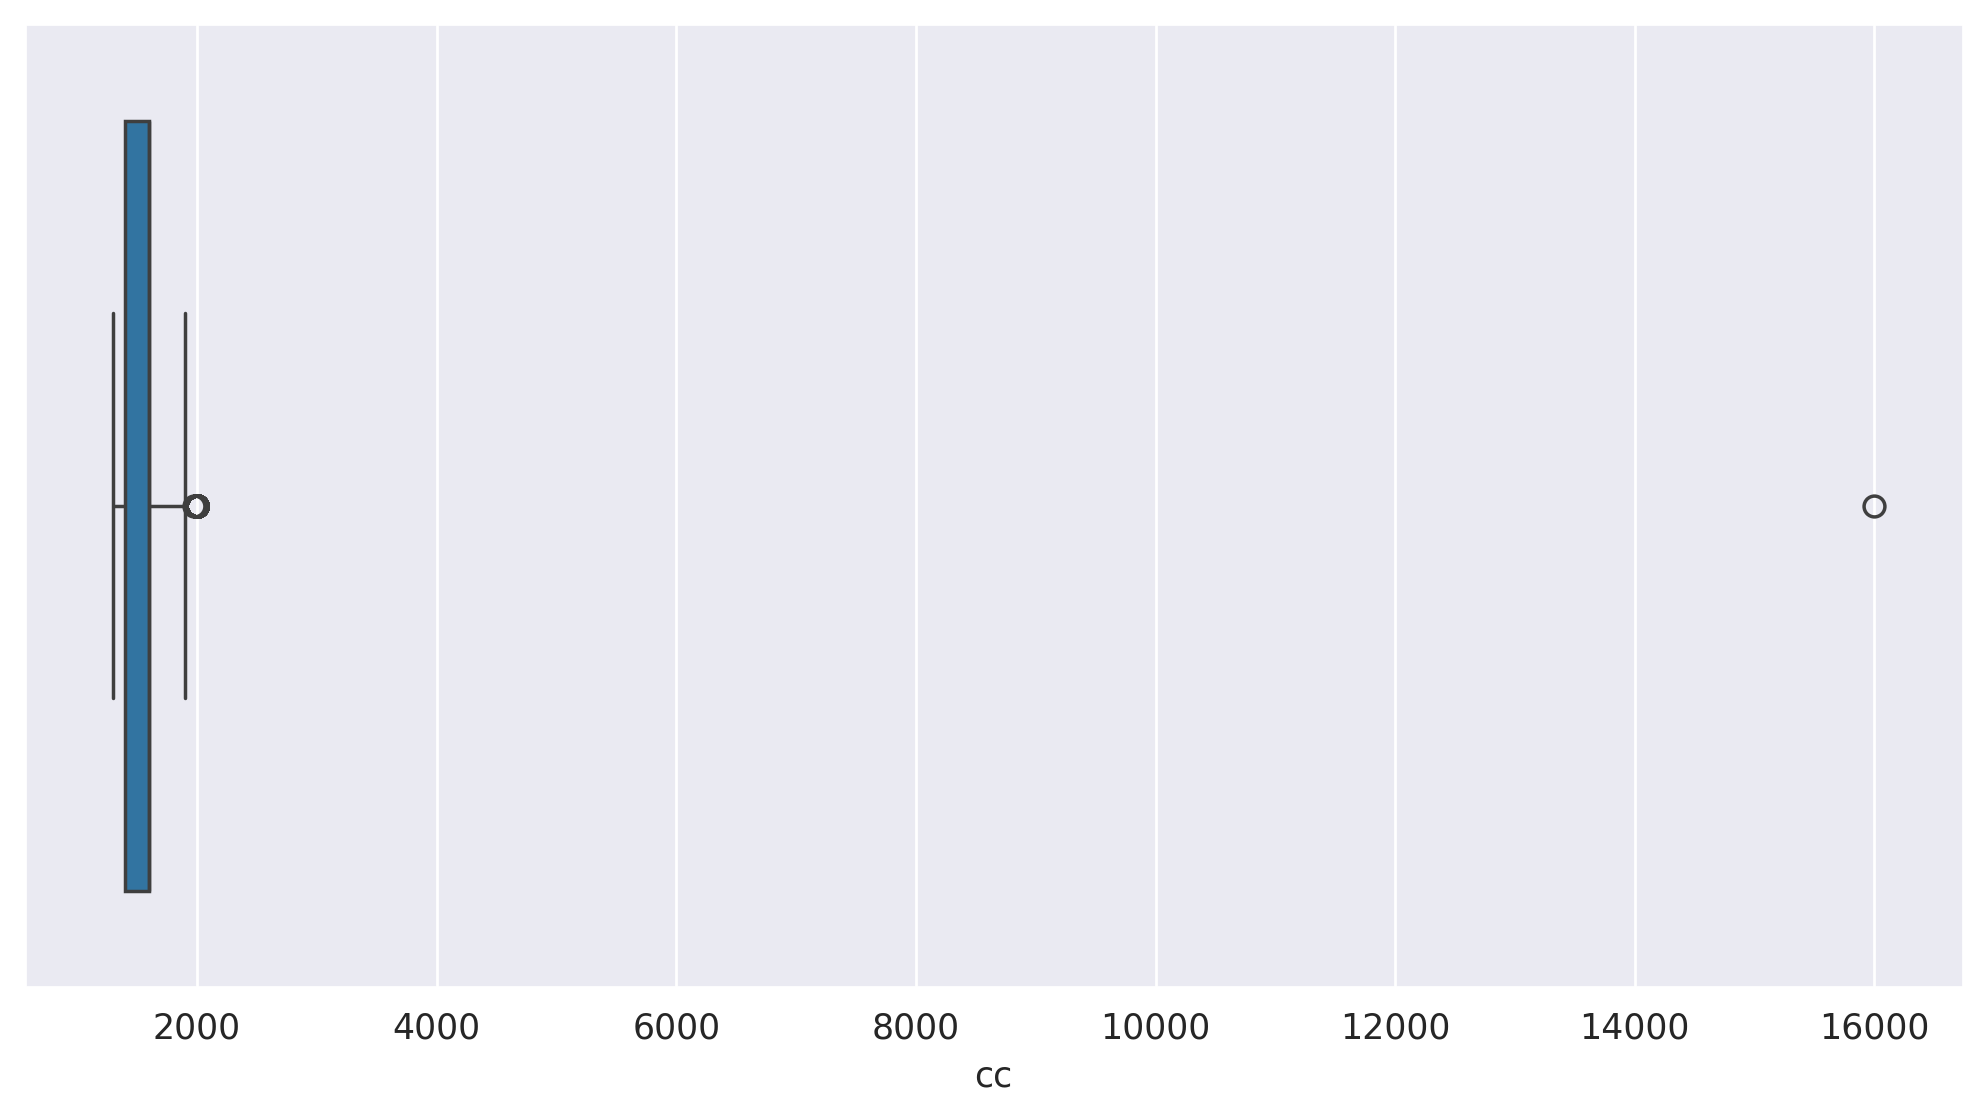

In [102]:
sns.boxplot(x = df['cc'])

In [103]:
outlier_detection(df,'Age_08_04')

(5.0, 109.0)

In [104]:
df.loc[df['Age_08_04']>17200.0,'Age_08_04']=109.0
df.loc[df['Age_08_04']<15.0,'Age_08_04']=5.0

In [105]:
outlier_detection(df,'KM')

(-23062.25, 153103.75)

In [106]:
df.loc[df['KM']>153103.75,'KM']=153103.75

In [107]:
outlier_detection(df,'HP')

(60.0, 140.0)

In [108]:
df.loc[df['HP']>140,'HP']=140

In [109]:
outlier_detection(df,'cc')

(1100.0, 1900.0)

In [110]:
df.loc[df['cc']>140,'cc']=1900.0

In [111]:
outlier_detection(df,'Weight')

(972.5, 1152.5)

In [112]:
df.loc[df['Weight']>1152.5,'Weight']=1152.5

<Axes: >

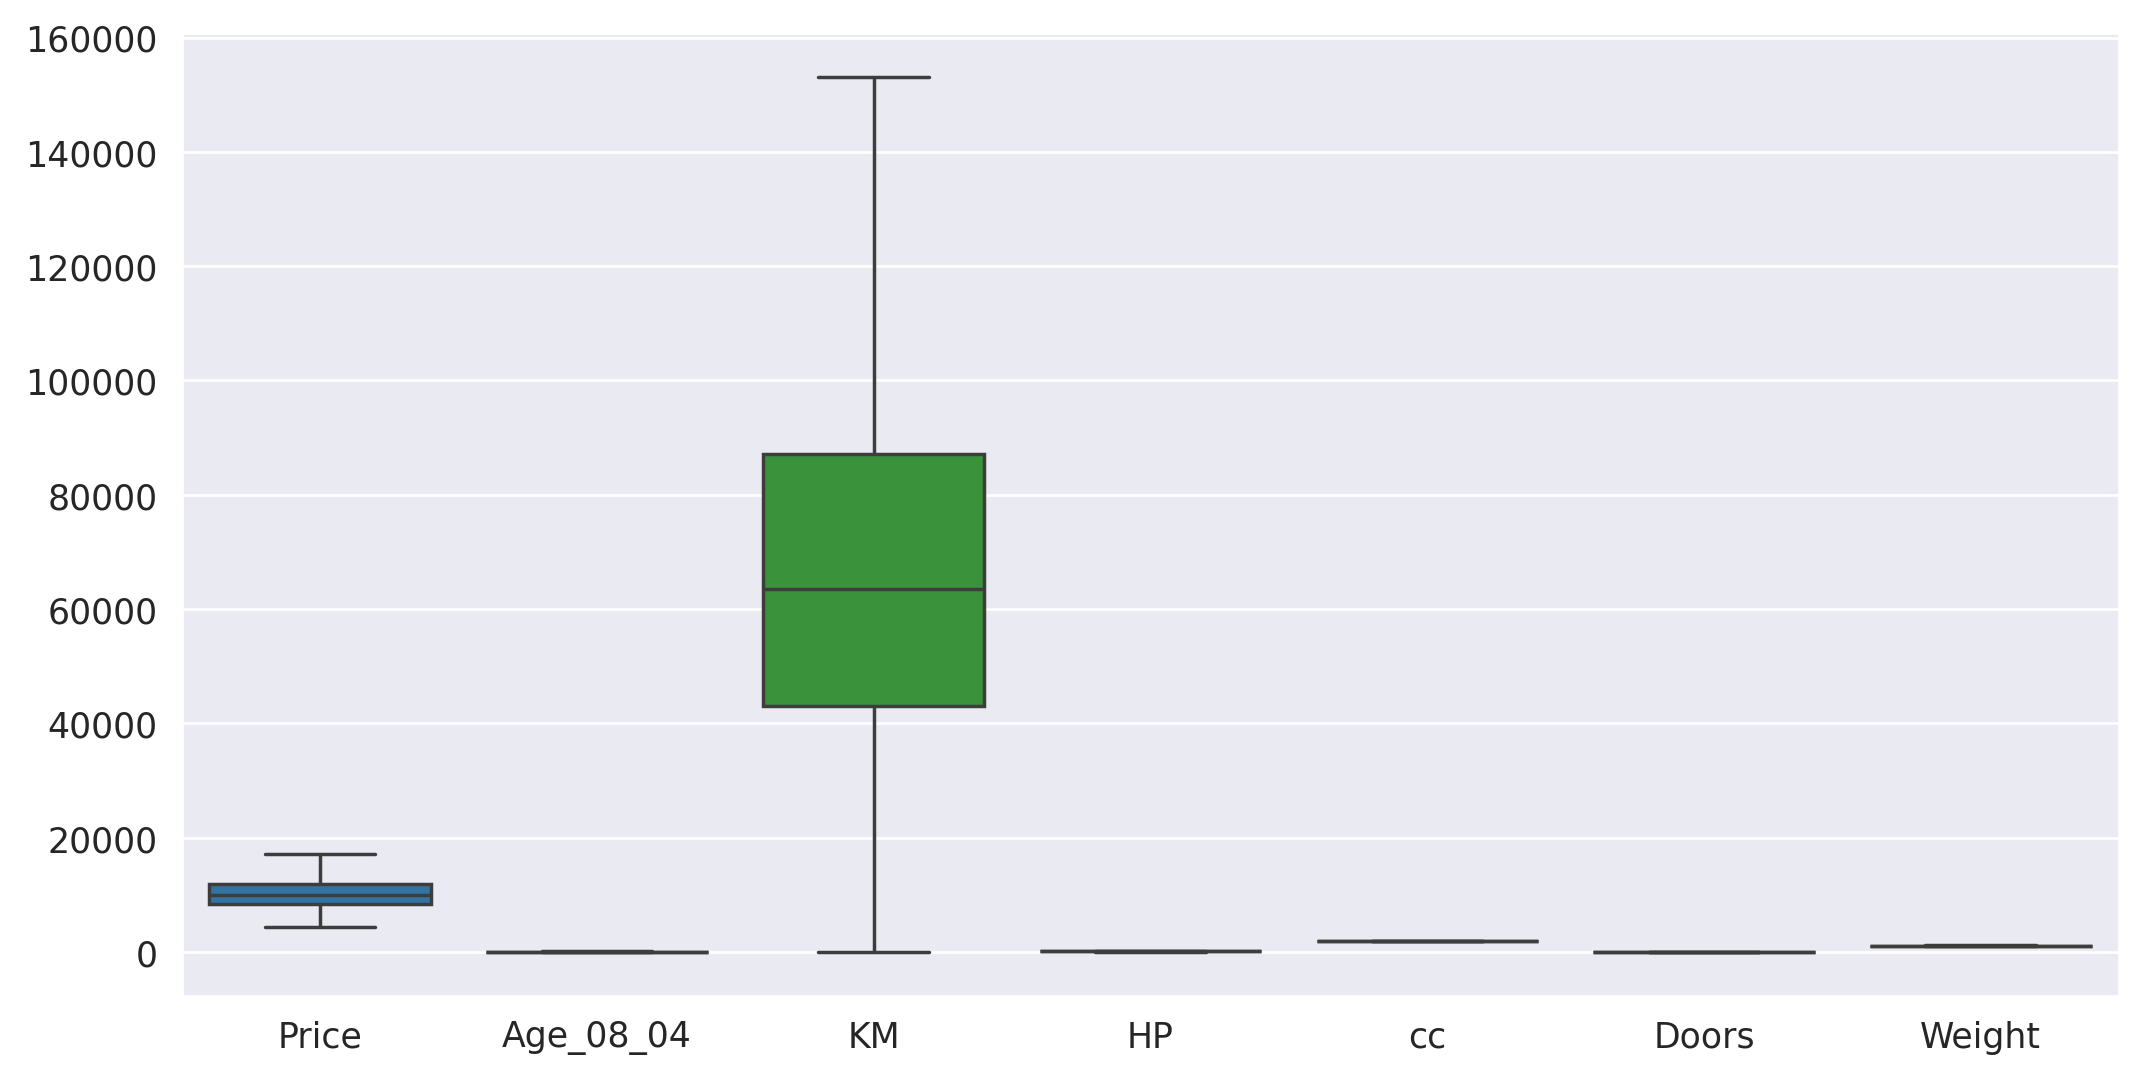

In [113]:
sns.boxplot(df)  #outliers are treated carefully

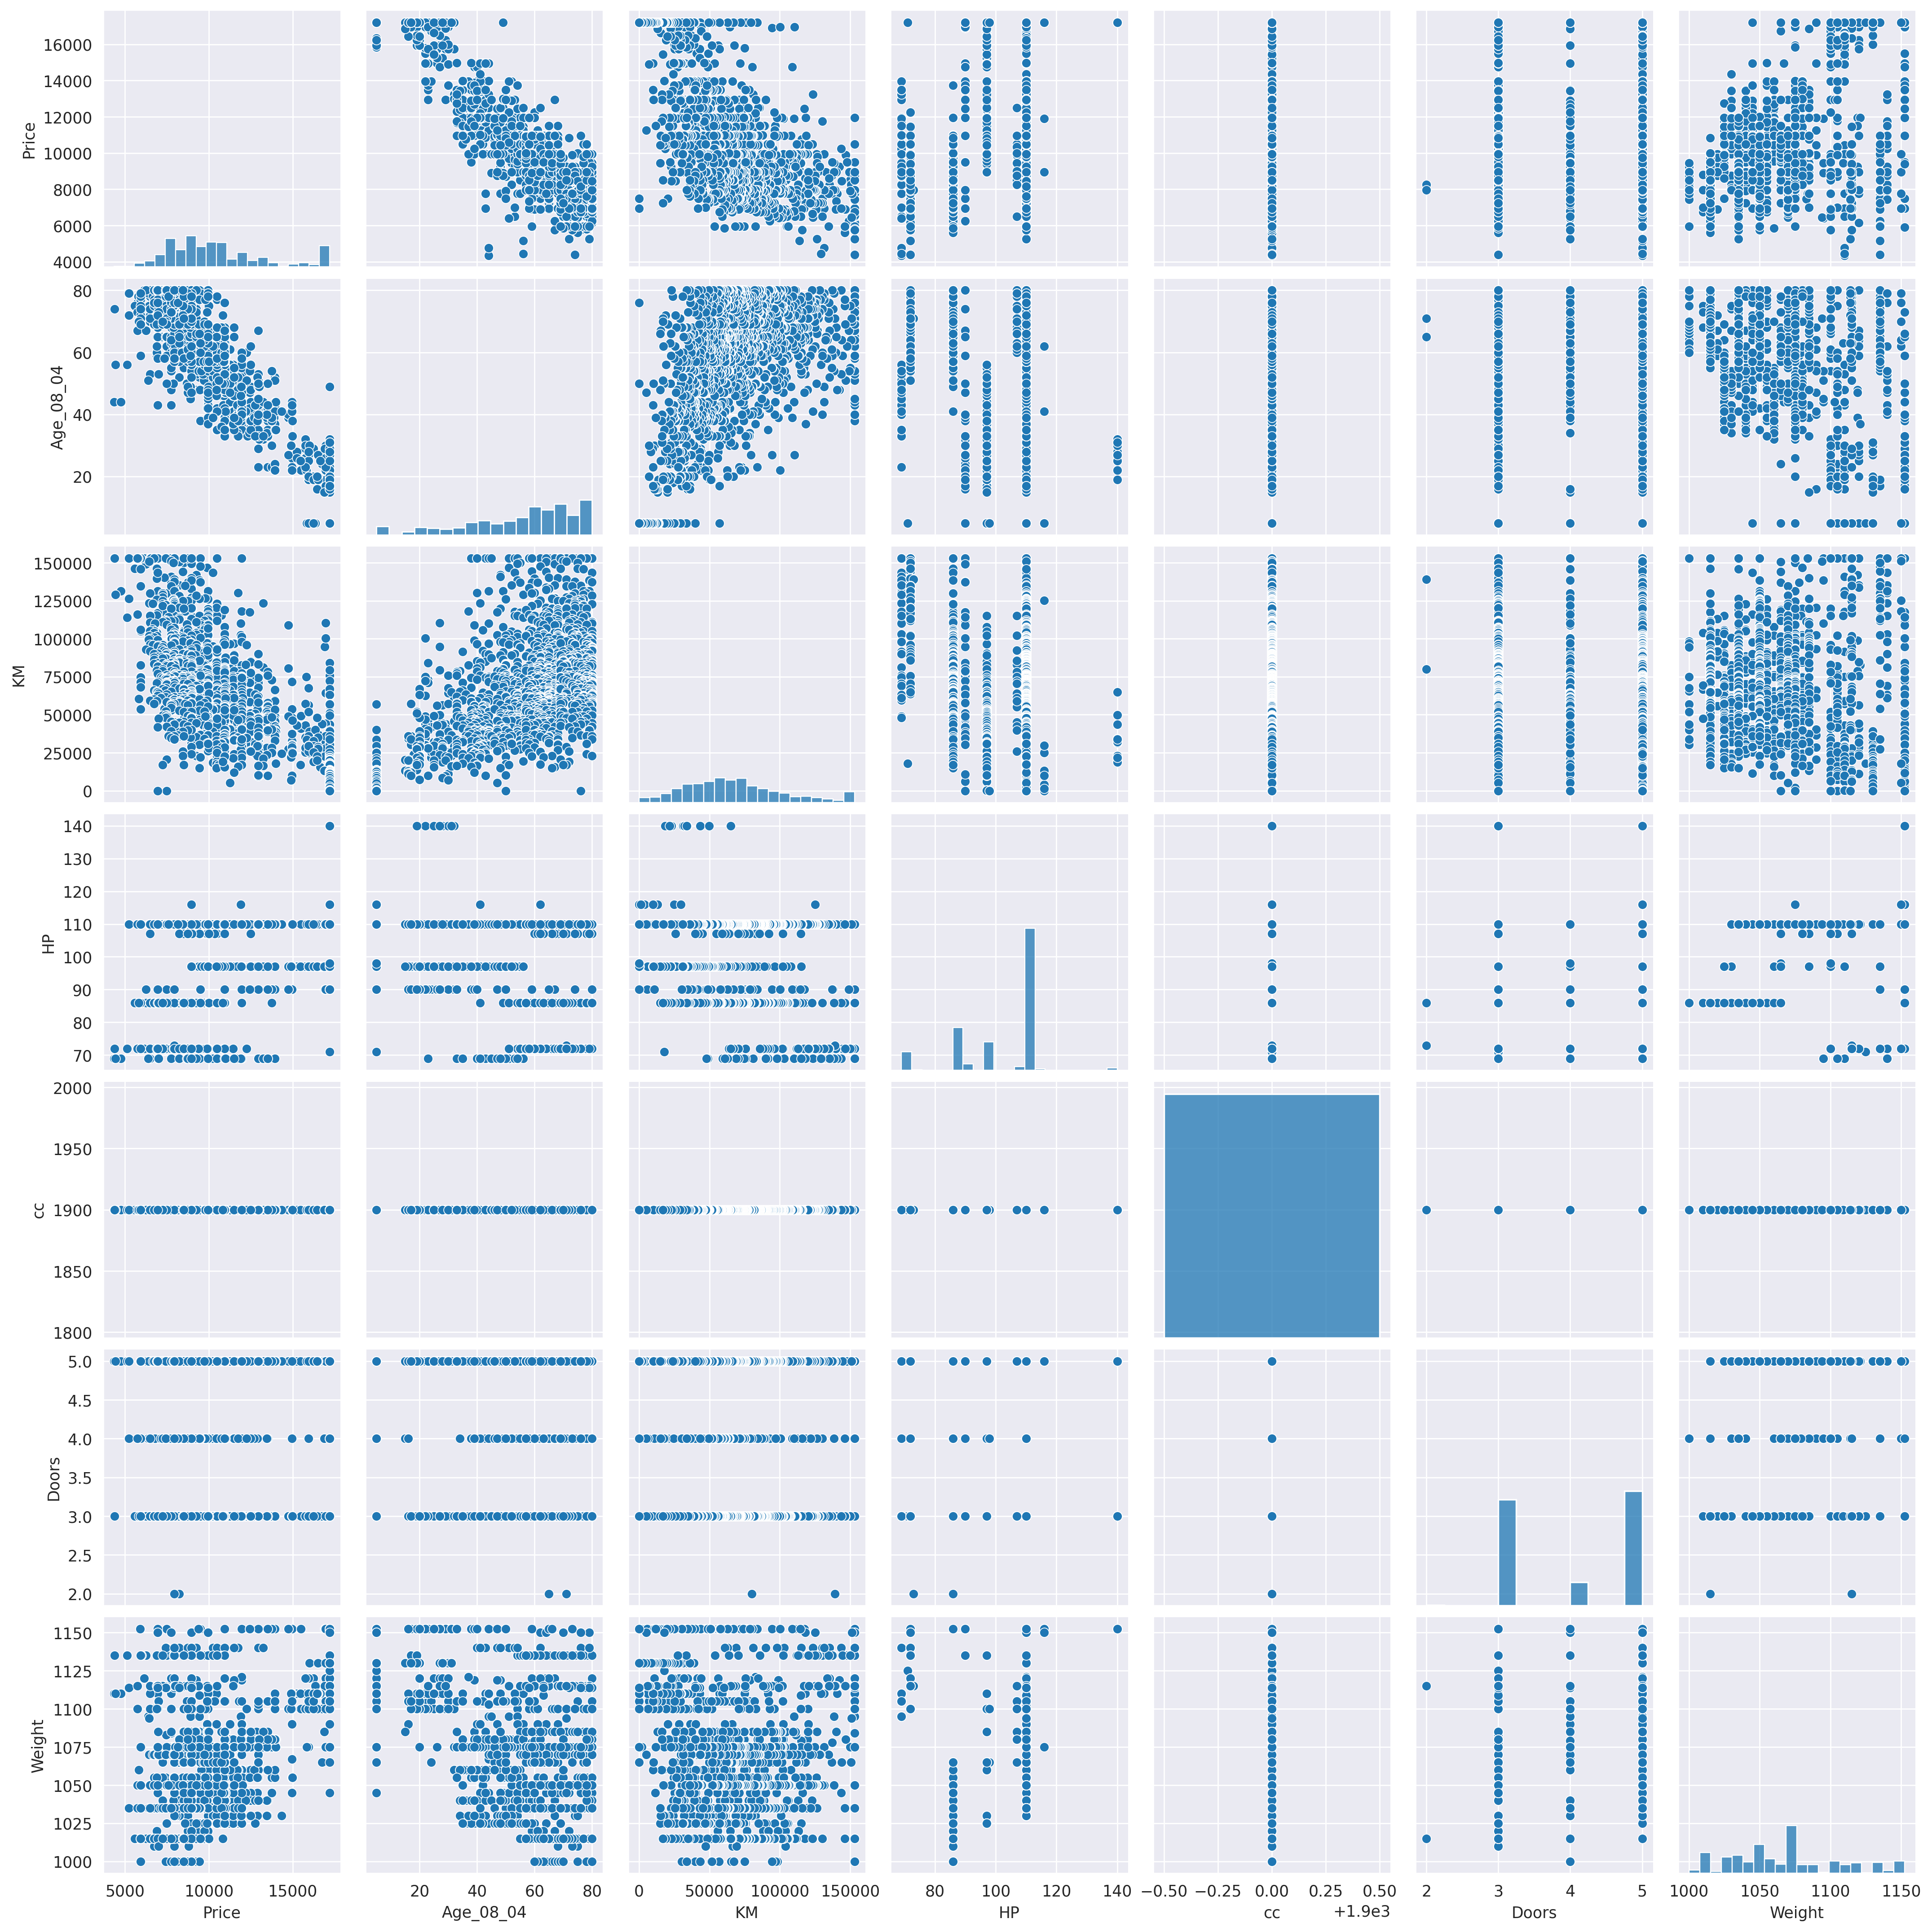

In [114]:
sns.pairplot(df)  #it shows relation between columns

<Axes: >

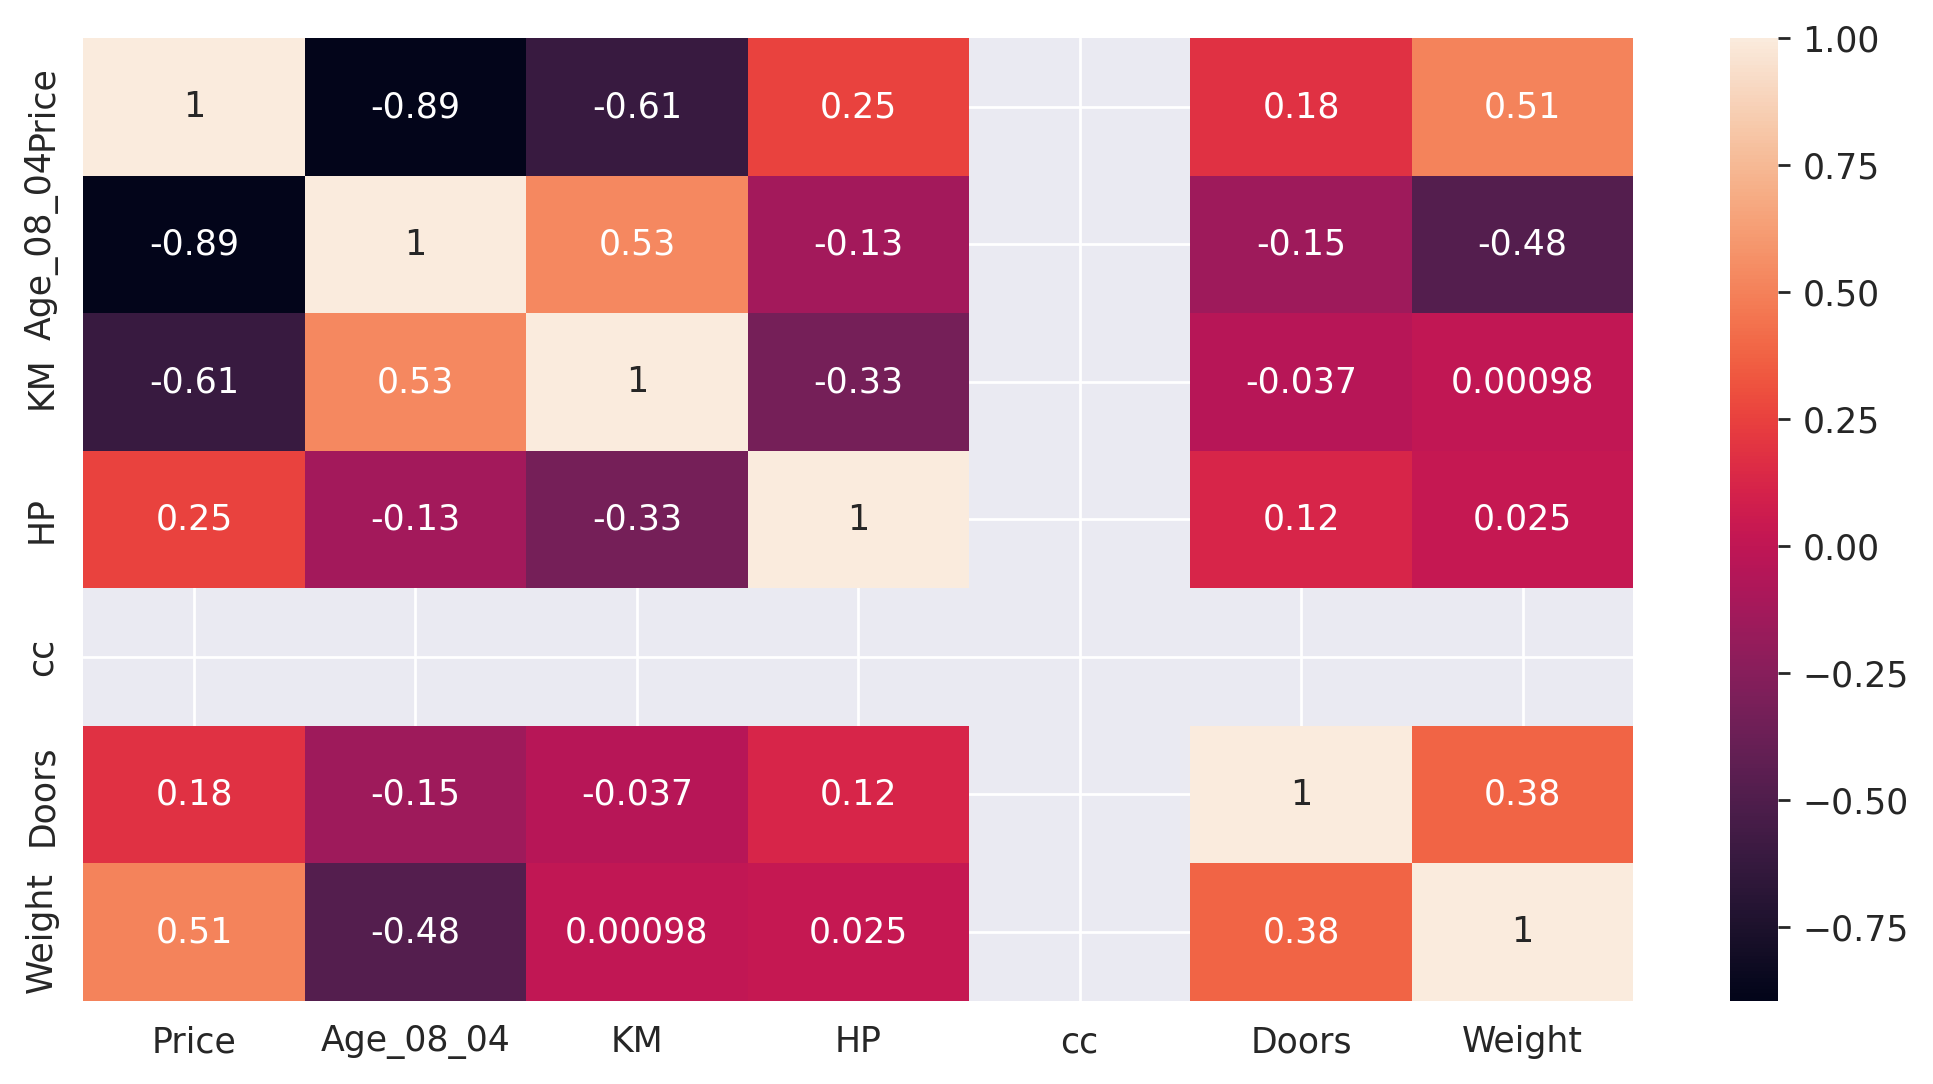

In [115]:
sns.heatmap(df.corr(),annot=True)   #it shows age and weight is normally related if they were highly related to each other it could have been a problem of multicolinearity


train test split


In [116]:
df

Price  Age_08_04       KM   HP    cc  Doors  Weight
0     13500         23  46986.0   90  1900      3  1152.5
1     13750         23  72937.0   90  1900      3  1152.5
2     13950         24  41711.0   90  1900      3  1152.5
3     14950         26  48000.0   90  1900      3  1152.5
4     13750         30  38500.0   90  1900      3  1152.5
...     ...        ...      ...  ...   ...    ...     ...
1431   7500         69  20544.0   86  1900      3  1025.0
1432  10845         72  19000.0   86  1900      3  1015.0
1433   8500         71  17016.0   86  1900      3  1015.0
1434   7250         70  16916.0   86  1900      3  1015.0
1435   6950         76      1.0  110  1900      5  1114.0

[1435 rows x 7 columns]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X= df.iloc[:,1:6]
Y= df.iloc[:,0]
test_size = 0.20
seed=7

In [119]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build a multiple linear regression model using the training dataset
model1 = smf.ols(formula="Price ~ Age_08_04 + KM", data=df).fit()
model2 = smf.ols(formula="Price ~ Age_08_04 + KM + HP", data=df).fit()
model3 = smf.ols(formula="Price ~ Age_08_04 + KM + HP + cc", data=df).fit()

# Interpret the coefficients of the model
print(model1.summary())
print(model2.summary())
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     3371.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        08:25:31   Log-Likelihood:                -12264.
No. Observations:                1435   AIC:                         2.453e+04
Df Residuals:                    1432   BIC:                         2.455e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.856e+04    103.543    179.202      0.0

Model validation technique

**1.Residual analysis**

In [120]:
import statsmodels.api as sm

In [121]:
df.head()

Price  Age_08_04       KM  HP    cc  Doors  Weight
0  13500         23  46986.0  90  1900      3  1152.5
1  13750         23  72937.0  90  1900      3  1152.5
2  13950         24  41711.0  90  1900      3  1152.5
3  14950         26  48000.0  90  1900      3  1152.5
4  13750         30  38500.0  90  1900      3  1152.5

In [122]:
model3.fittedvalues

0       14647.505260
1       14319.160313
2       14588.035883
3       14256.041732
4       13871.395257
            ...     
1431     9085.053174
1432     8725.954732
1433     8877.268585
1434     9004.745134
1435     9009.232268
Length: 1435, dtype: float64

In [123]:
model3.params   # predicted using equation: y=m1x1+m2x2+m3x3+c

Intercept      0.004457
Age_08_04   -126.211299
KM            -0.012652
HP            22.822414
cc             8.468860
dtype: float64

In [124]:
model3.resid  #erro=actual-predicted value

0      -1147.505260
1       -569.160313
2       -638.035883
3        693.958268
4       -121.395257
           ...     
1431   -1585.053174
1432    2119.045268
1433    -377.268585
1434   -1754.745134
1435   -2059.232268
Length: 1435, dtype: float64

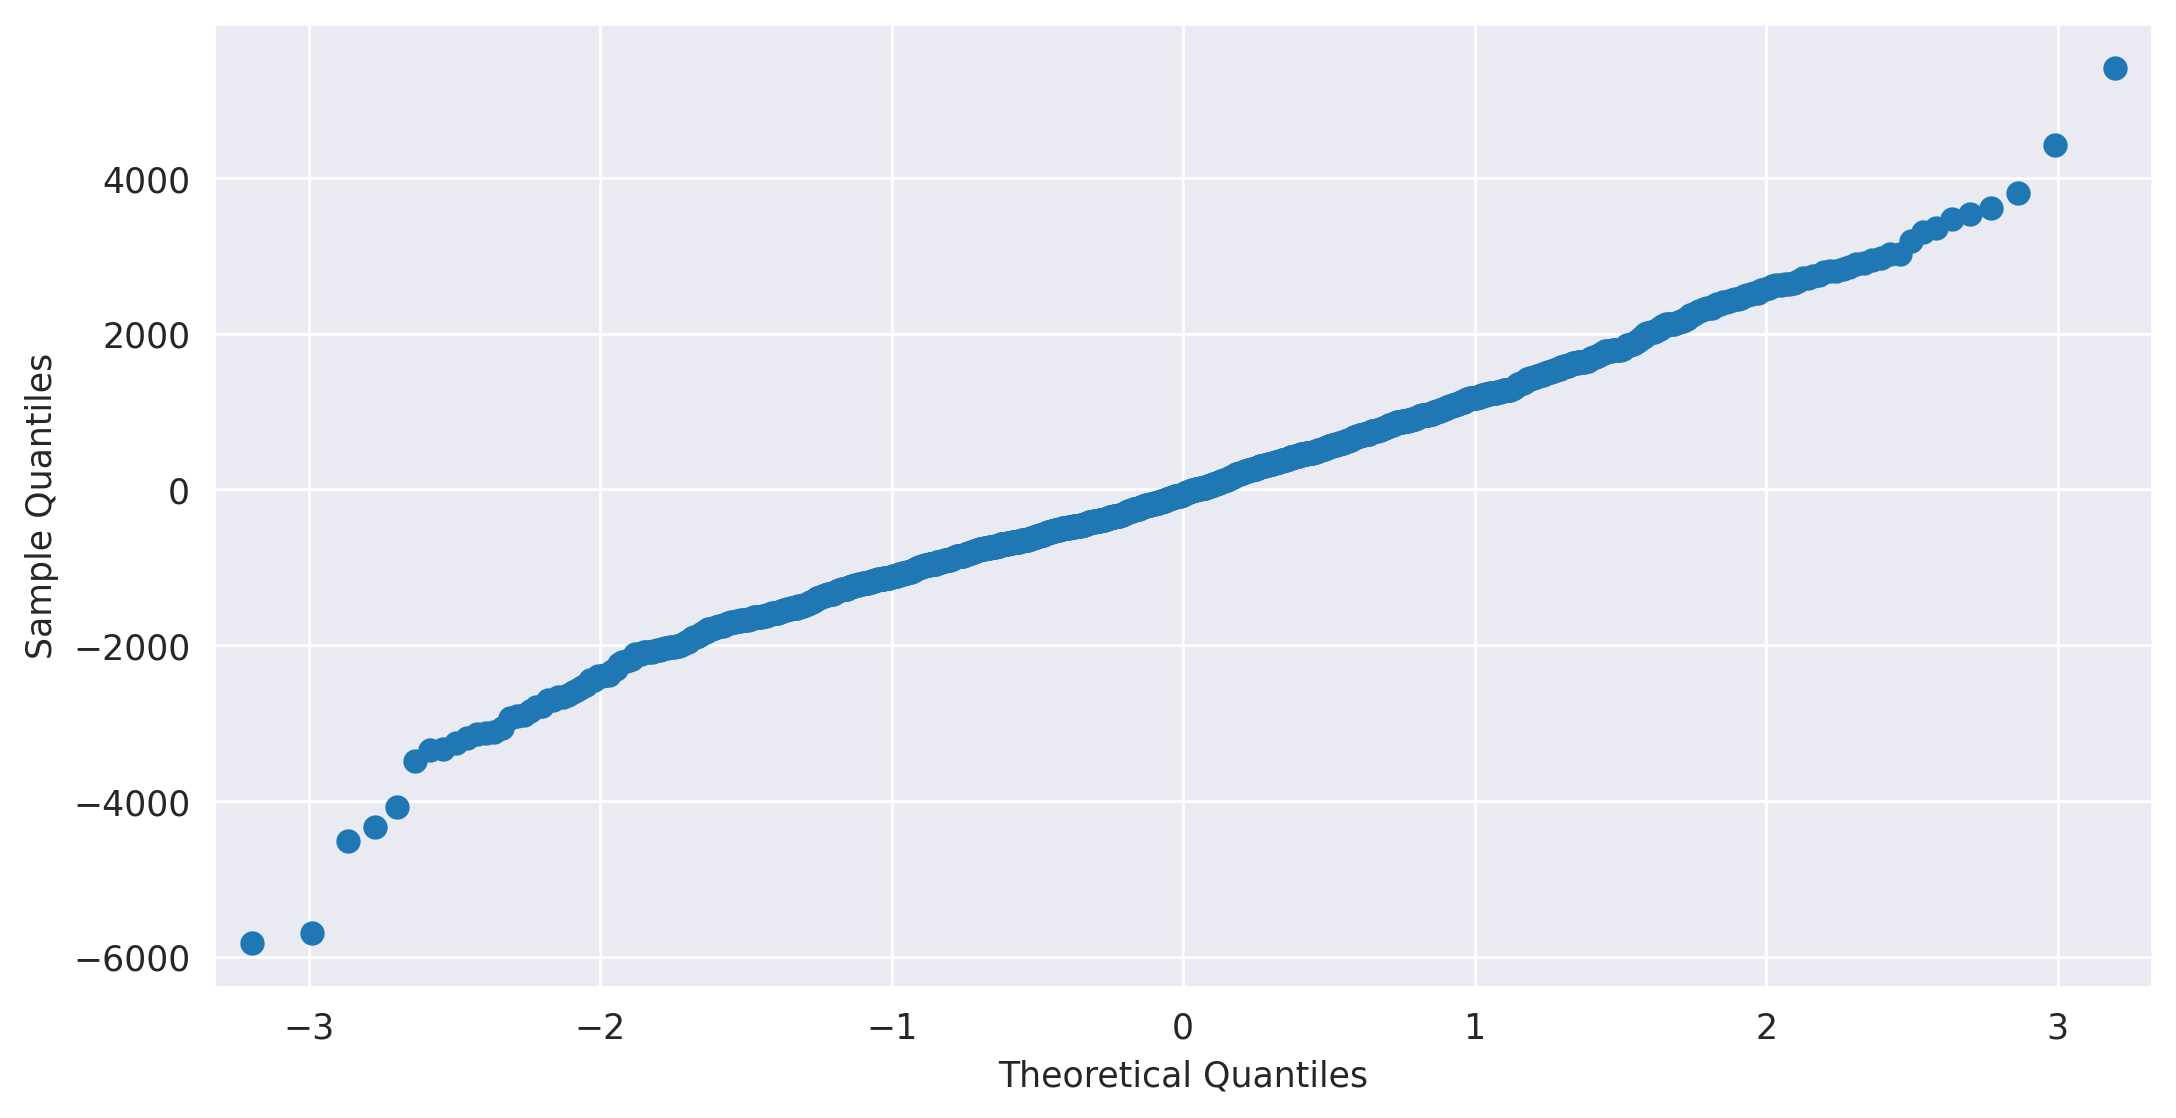

In [125]:
sm.qqplot(model3.resid);

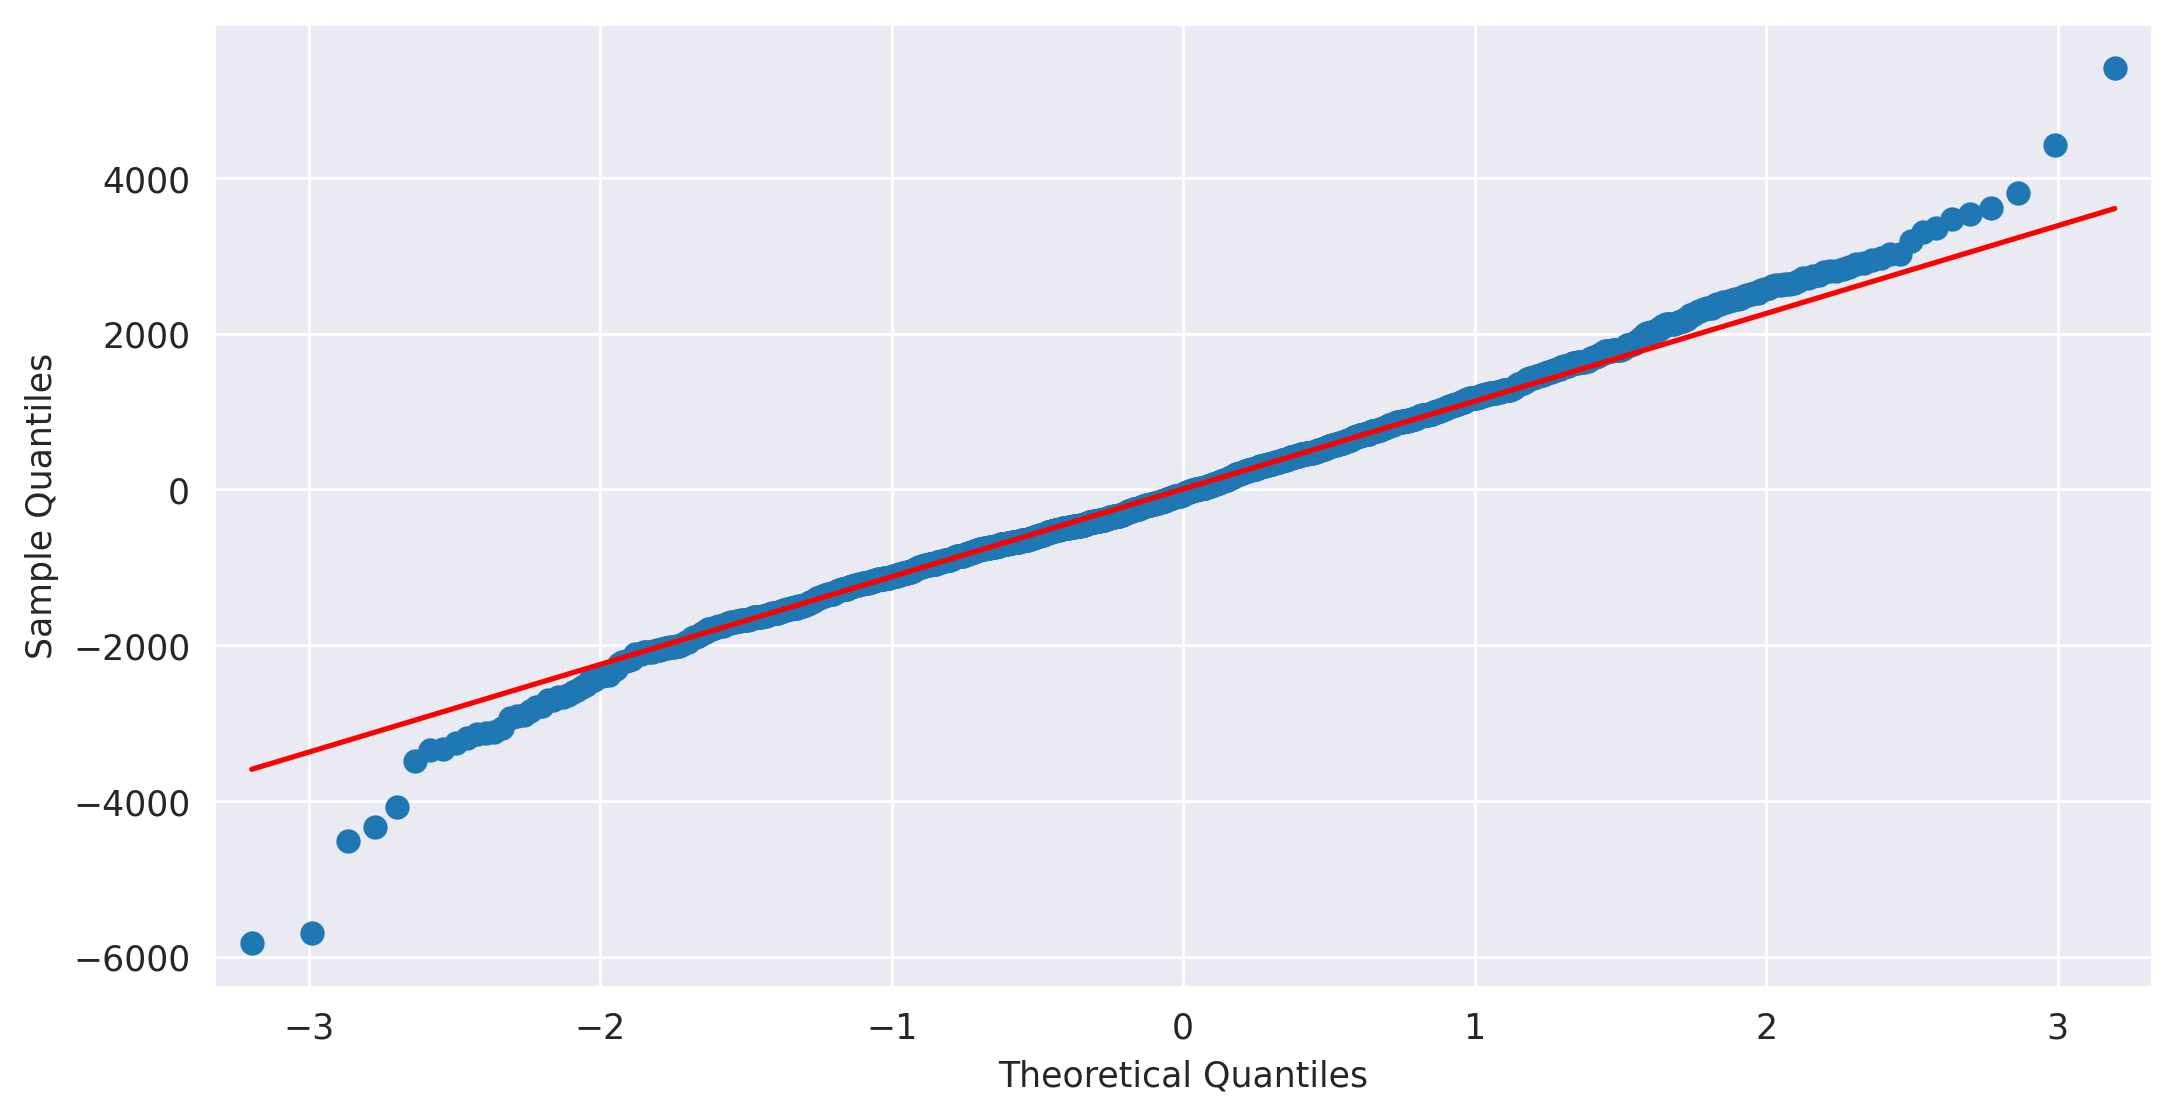

In [126]:
sm.qqplot(model3.resid,line='q');   # Data is not following normal distribution

In [127]:
np.argmax(model3.resid),np.max(model3.resid)

# get index for higher residuals
# argmax() finds max error value and returns its index, max() will return max error

(522, 5410.208975147252)

2.Residual plot of homoscedasticity

In [128]:
model3.params

Intercept      0.004457
Age_08_04   -126.211299
KM            -0.012652
HP            22.822414
cc             8.468860
dtype: float64

In [129]:
model3.fittedvalues

0       14647.505260
1       14319.160313
2       14588.035883
3       14256.041732
4       13871.395257
            ...     
1431     9085.053174
1432     8725.954732
1433     8877.268585
1434     9004.745134
1435     9009.232268
Length: 1435, dtype: float64

In [130]:
model3.resid

0      -1147.505260
1       -569.160313
2       -638.035883
3        693.958268
4       -121.395257
           ...     
1431   -1585.053174
1432    2119.045268
1433    -377.268585
1434   -1754.745134
1435   -2059.232268
Length: 1435, dtype: float64

Text(0, 0.5, 'Errors')

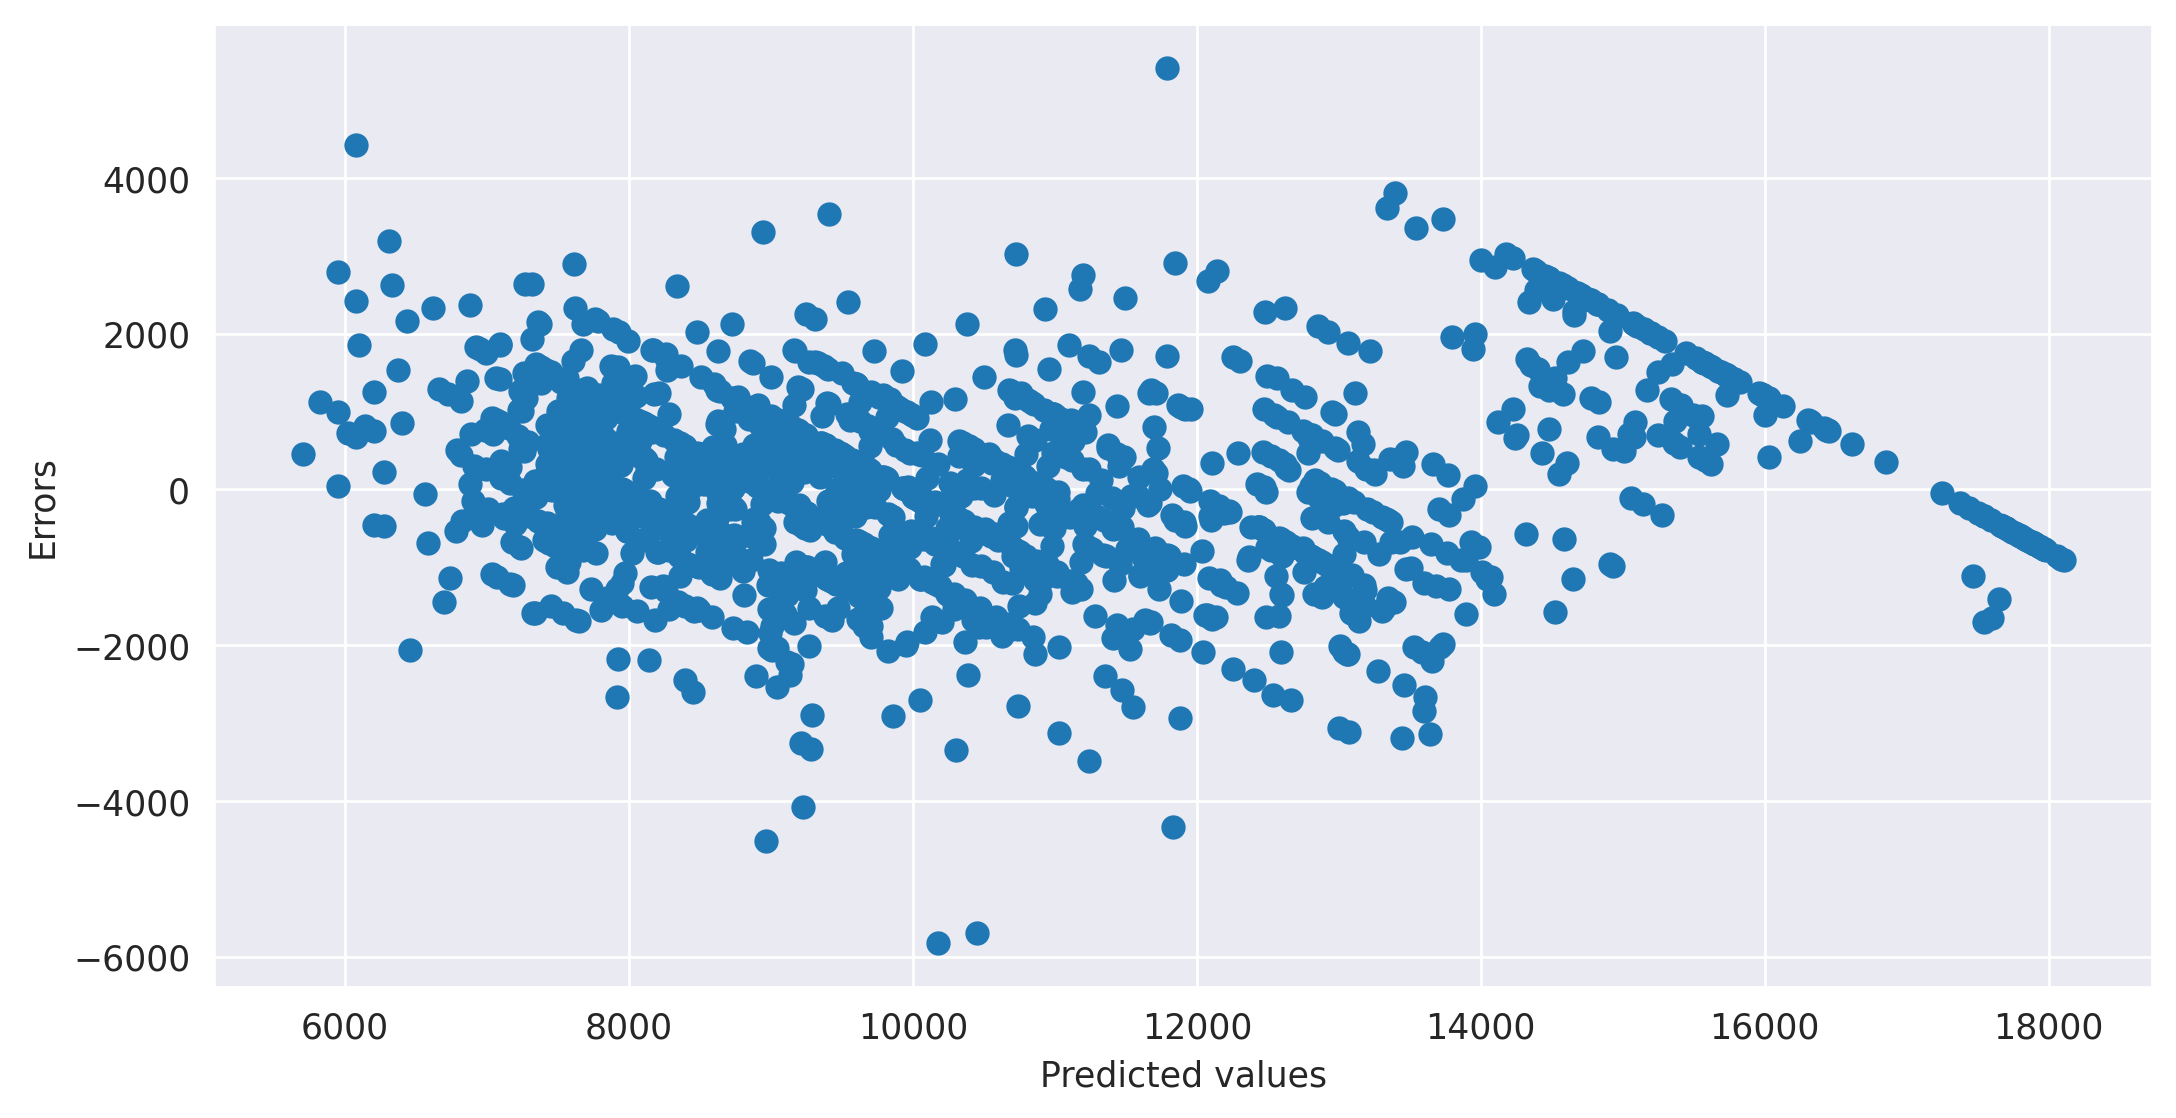

In [131]:
plt.scatter(model3.fittedvalues , model3.resid)
plt.xlabel('Predicted values')
plt.ylabel('Errors')

#pattern is visible

3.Residual vs Regressor (x)

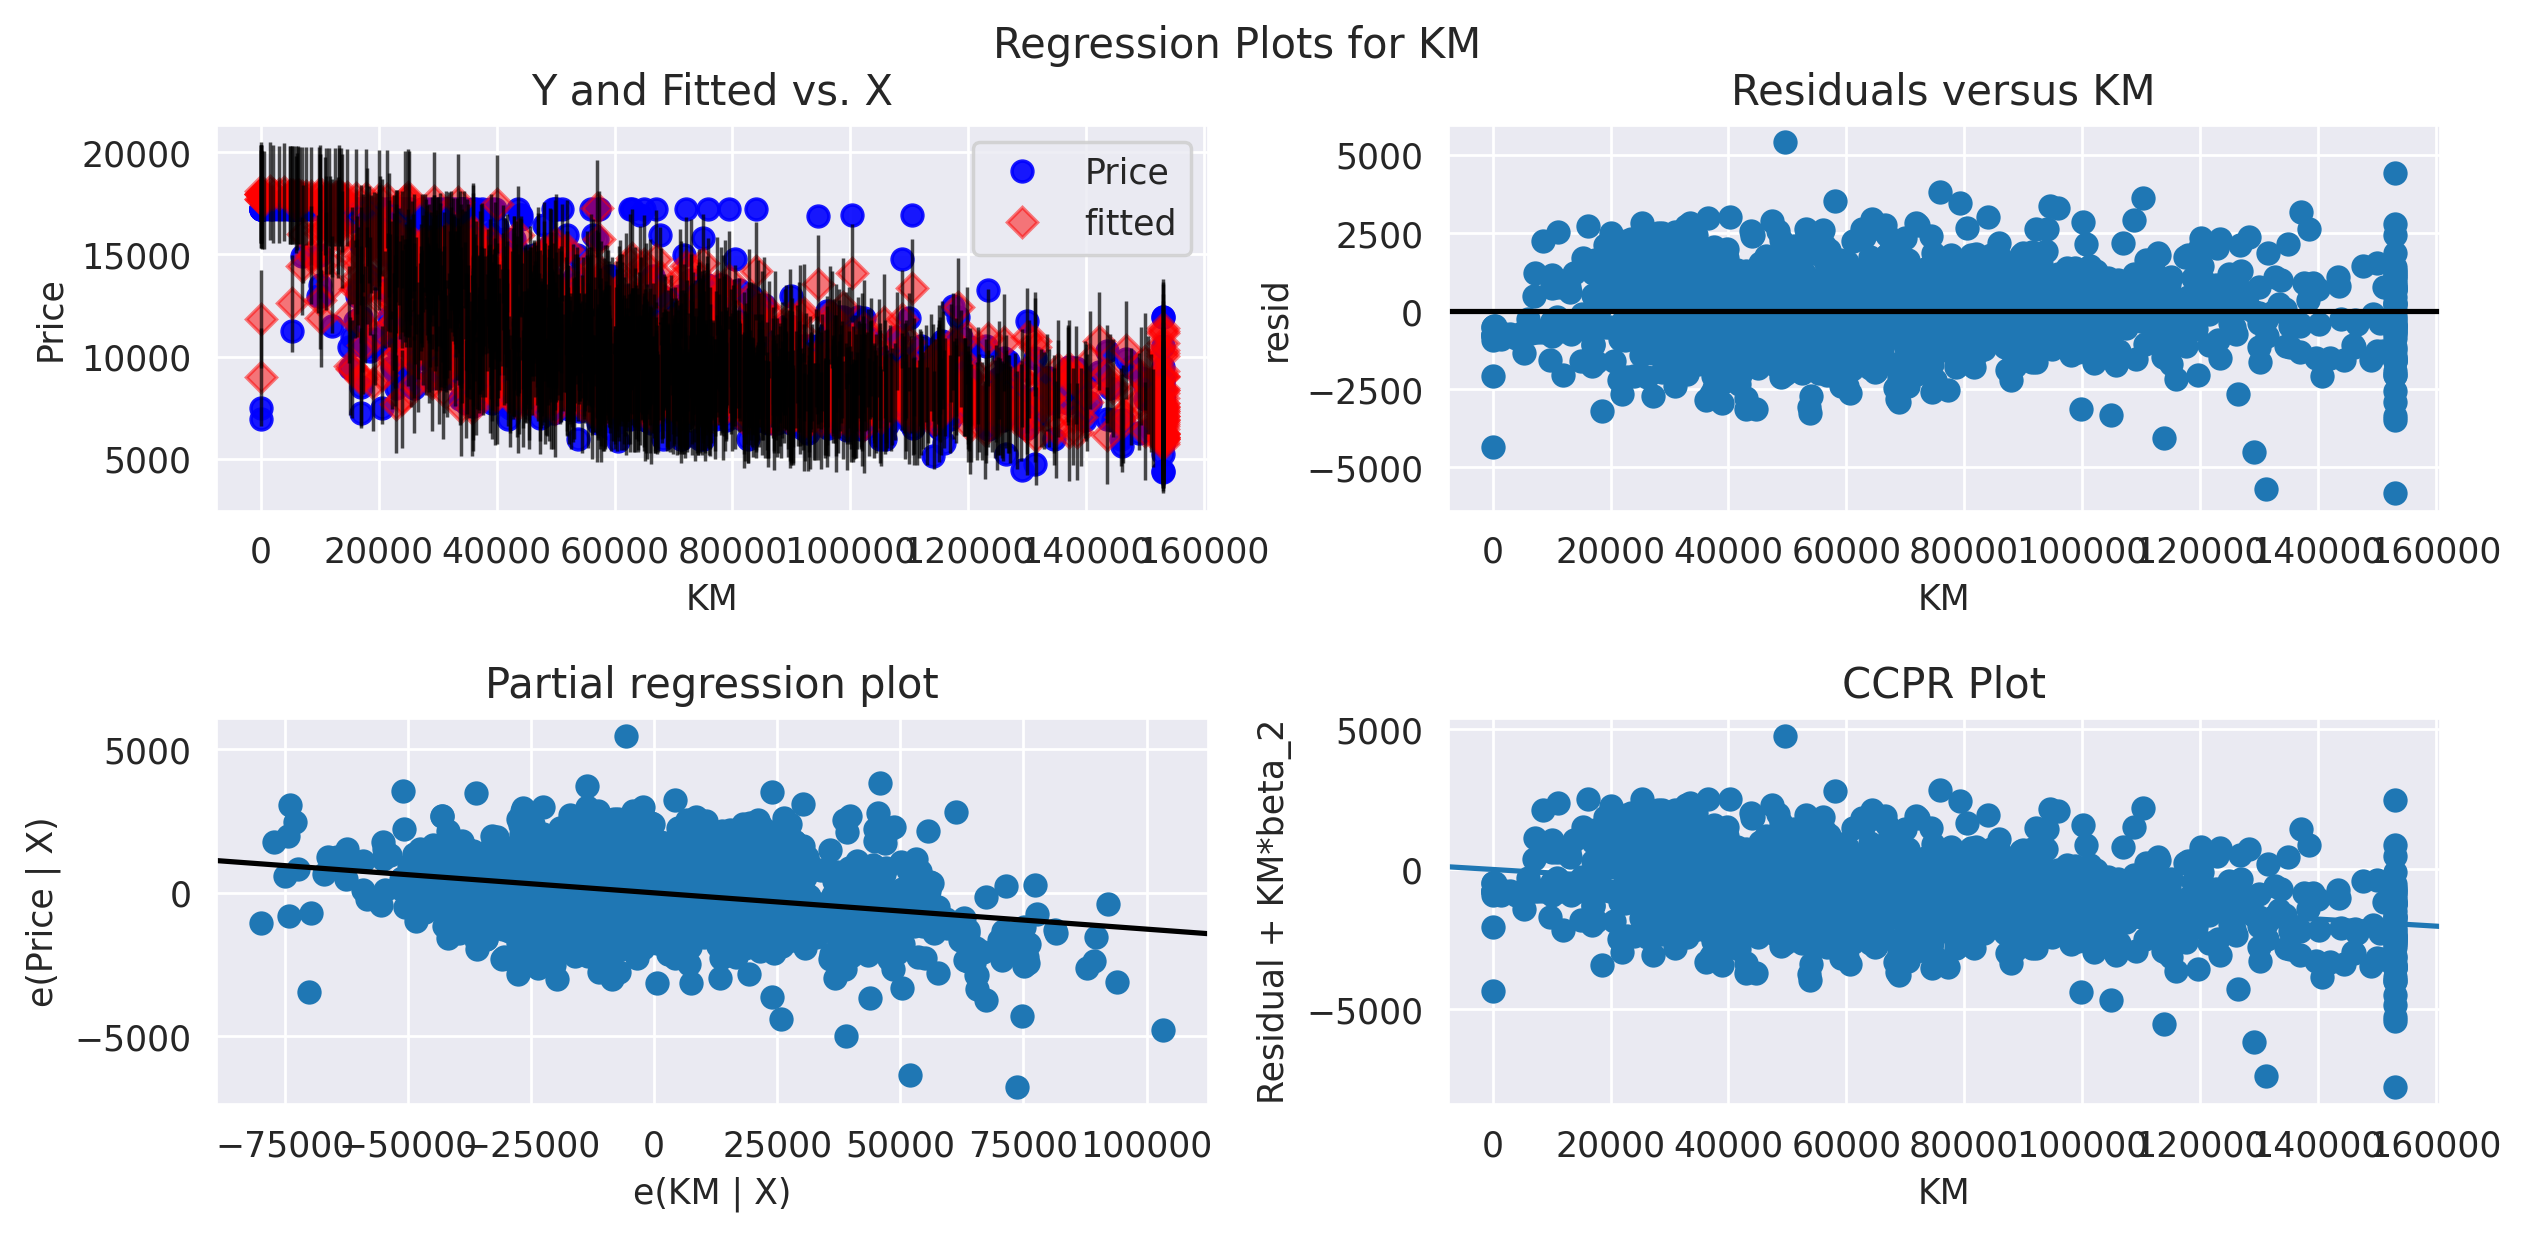

In [132]:
sm.graphics.plot_regress_exog(model3,'KM');

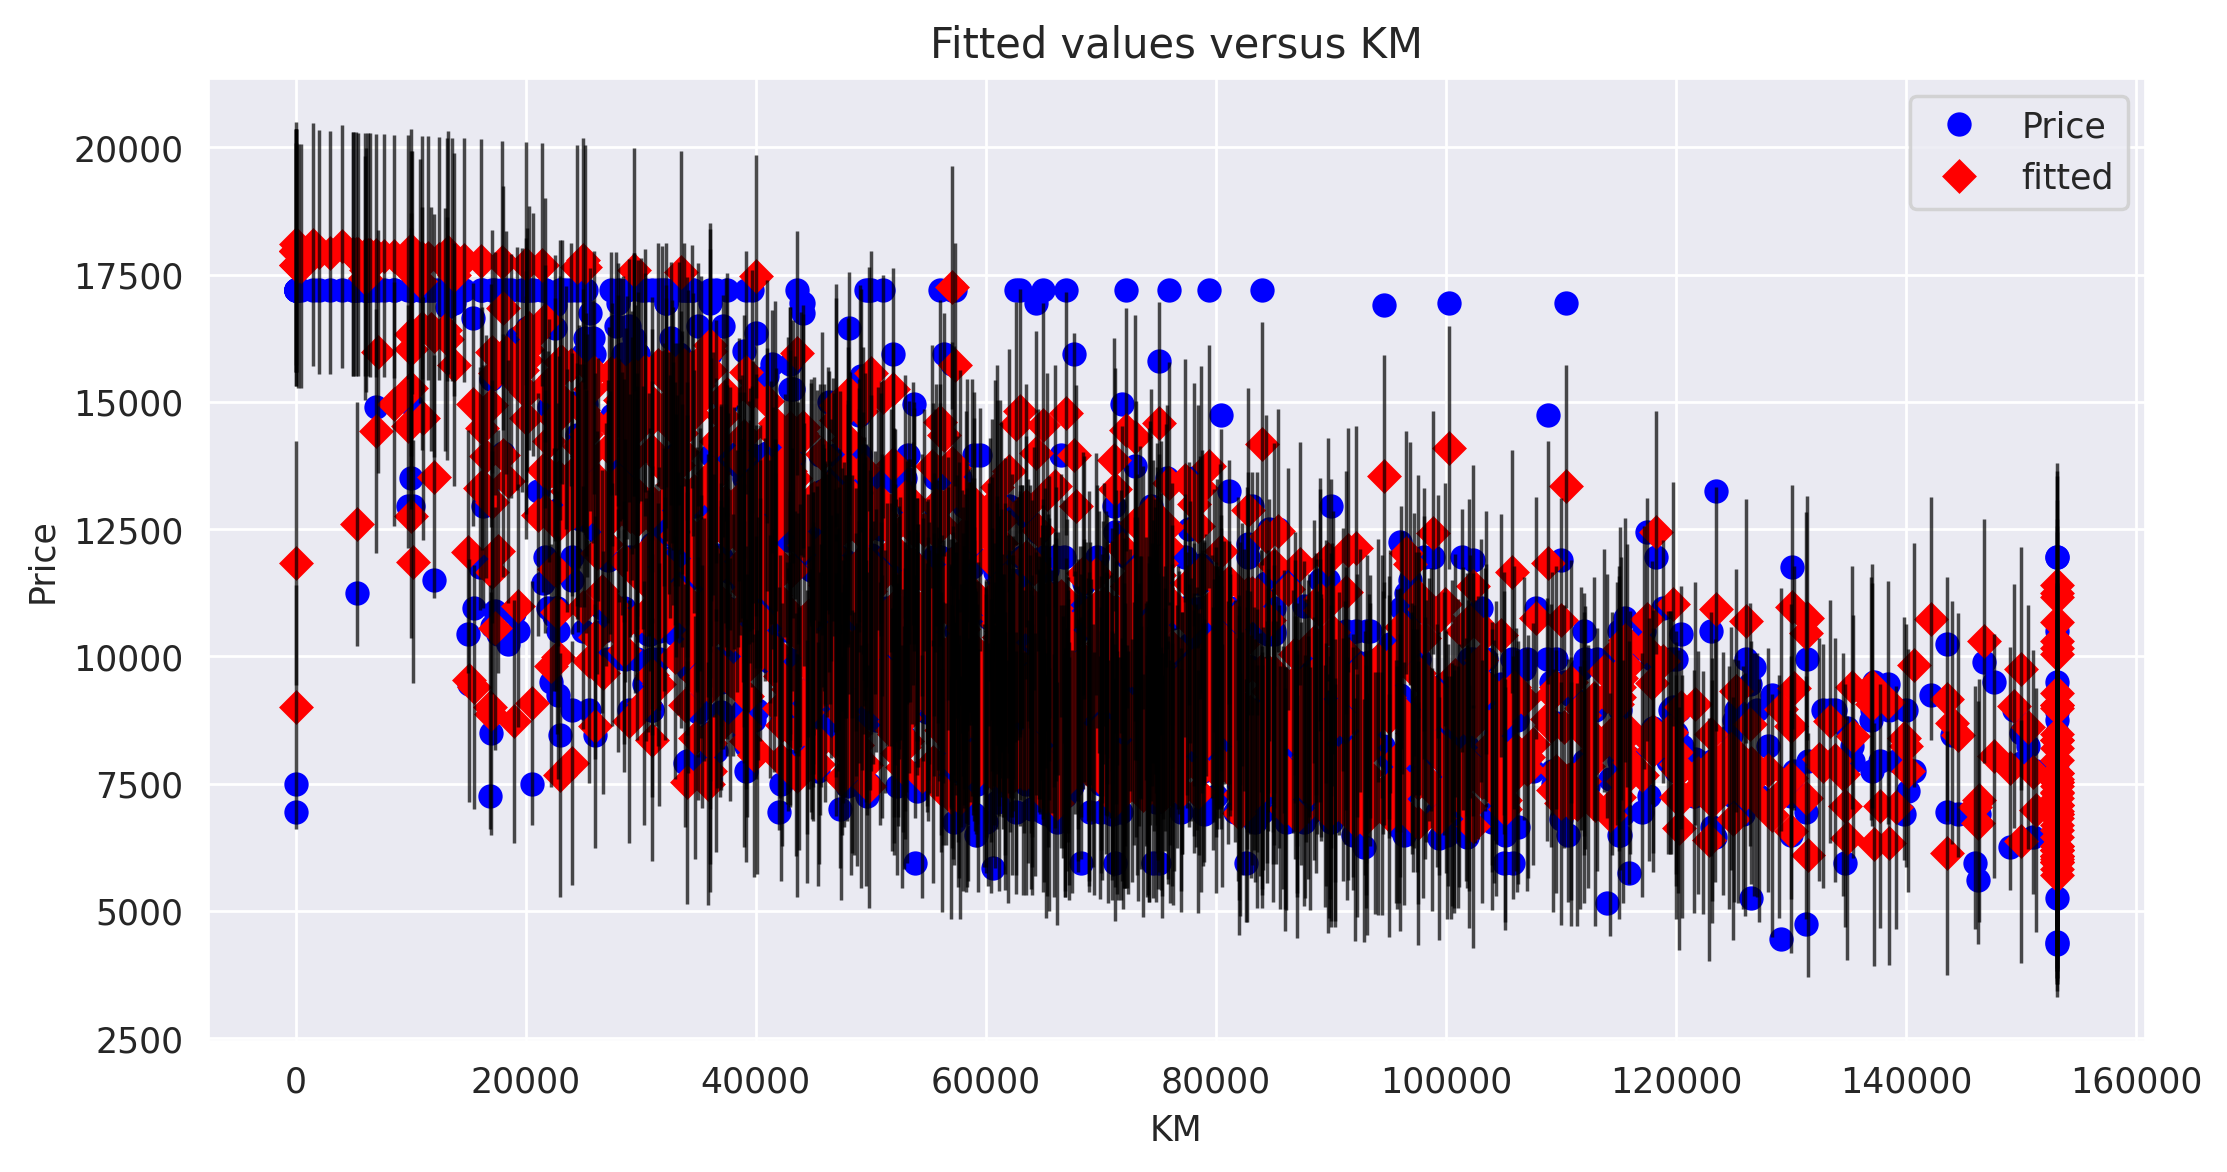

In [133]:
sm.graphics.plot_fit(model3,'KM');

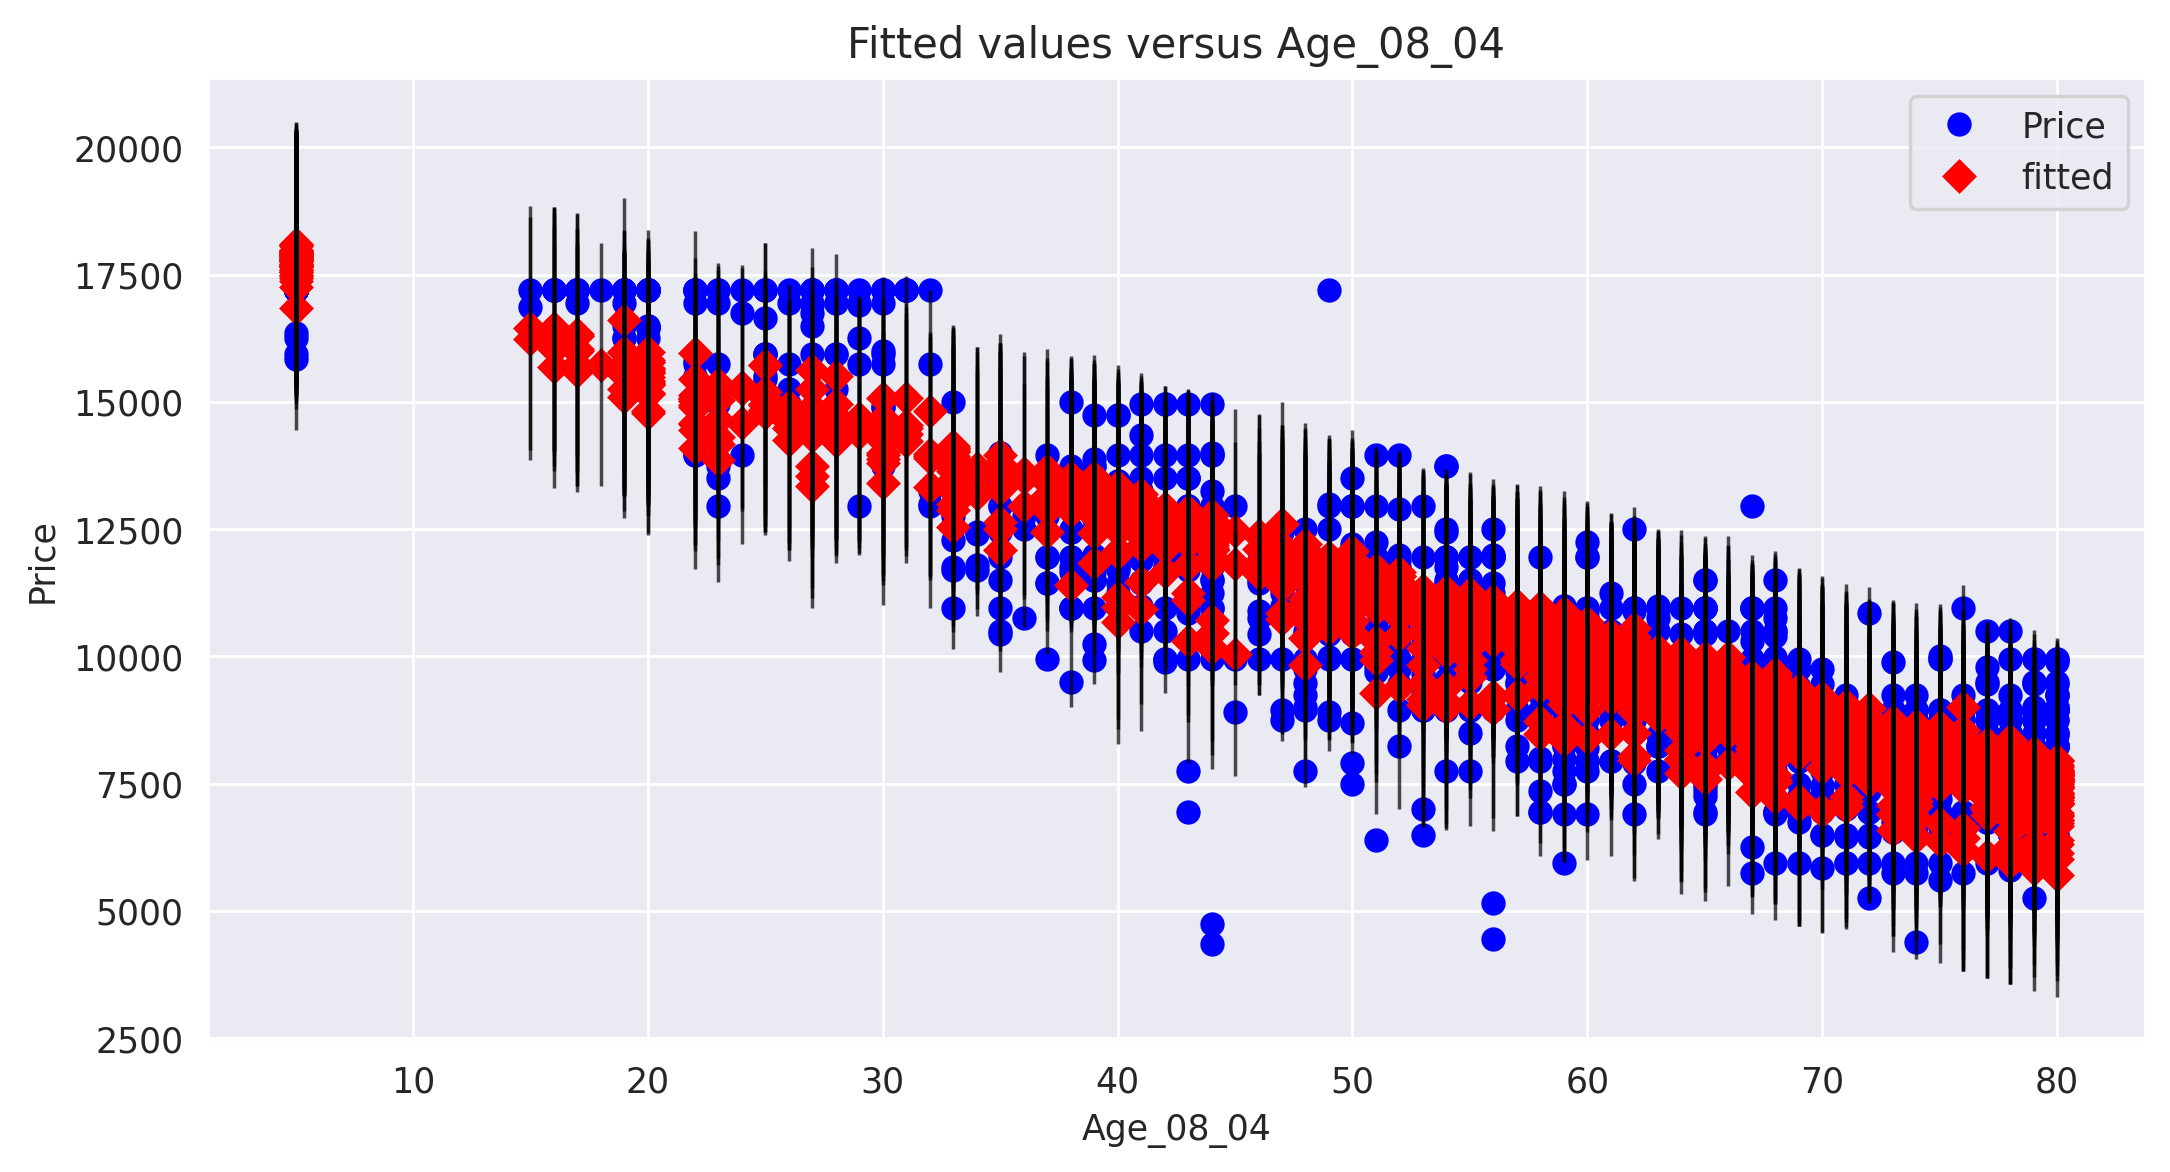

In [134]:
sm.graphics.plot_fit(model3,'Age_08_04');

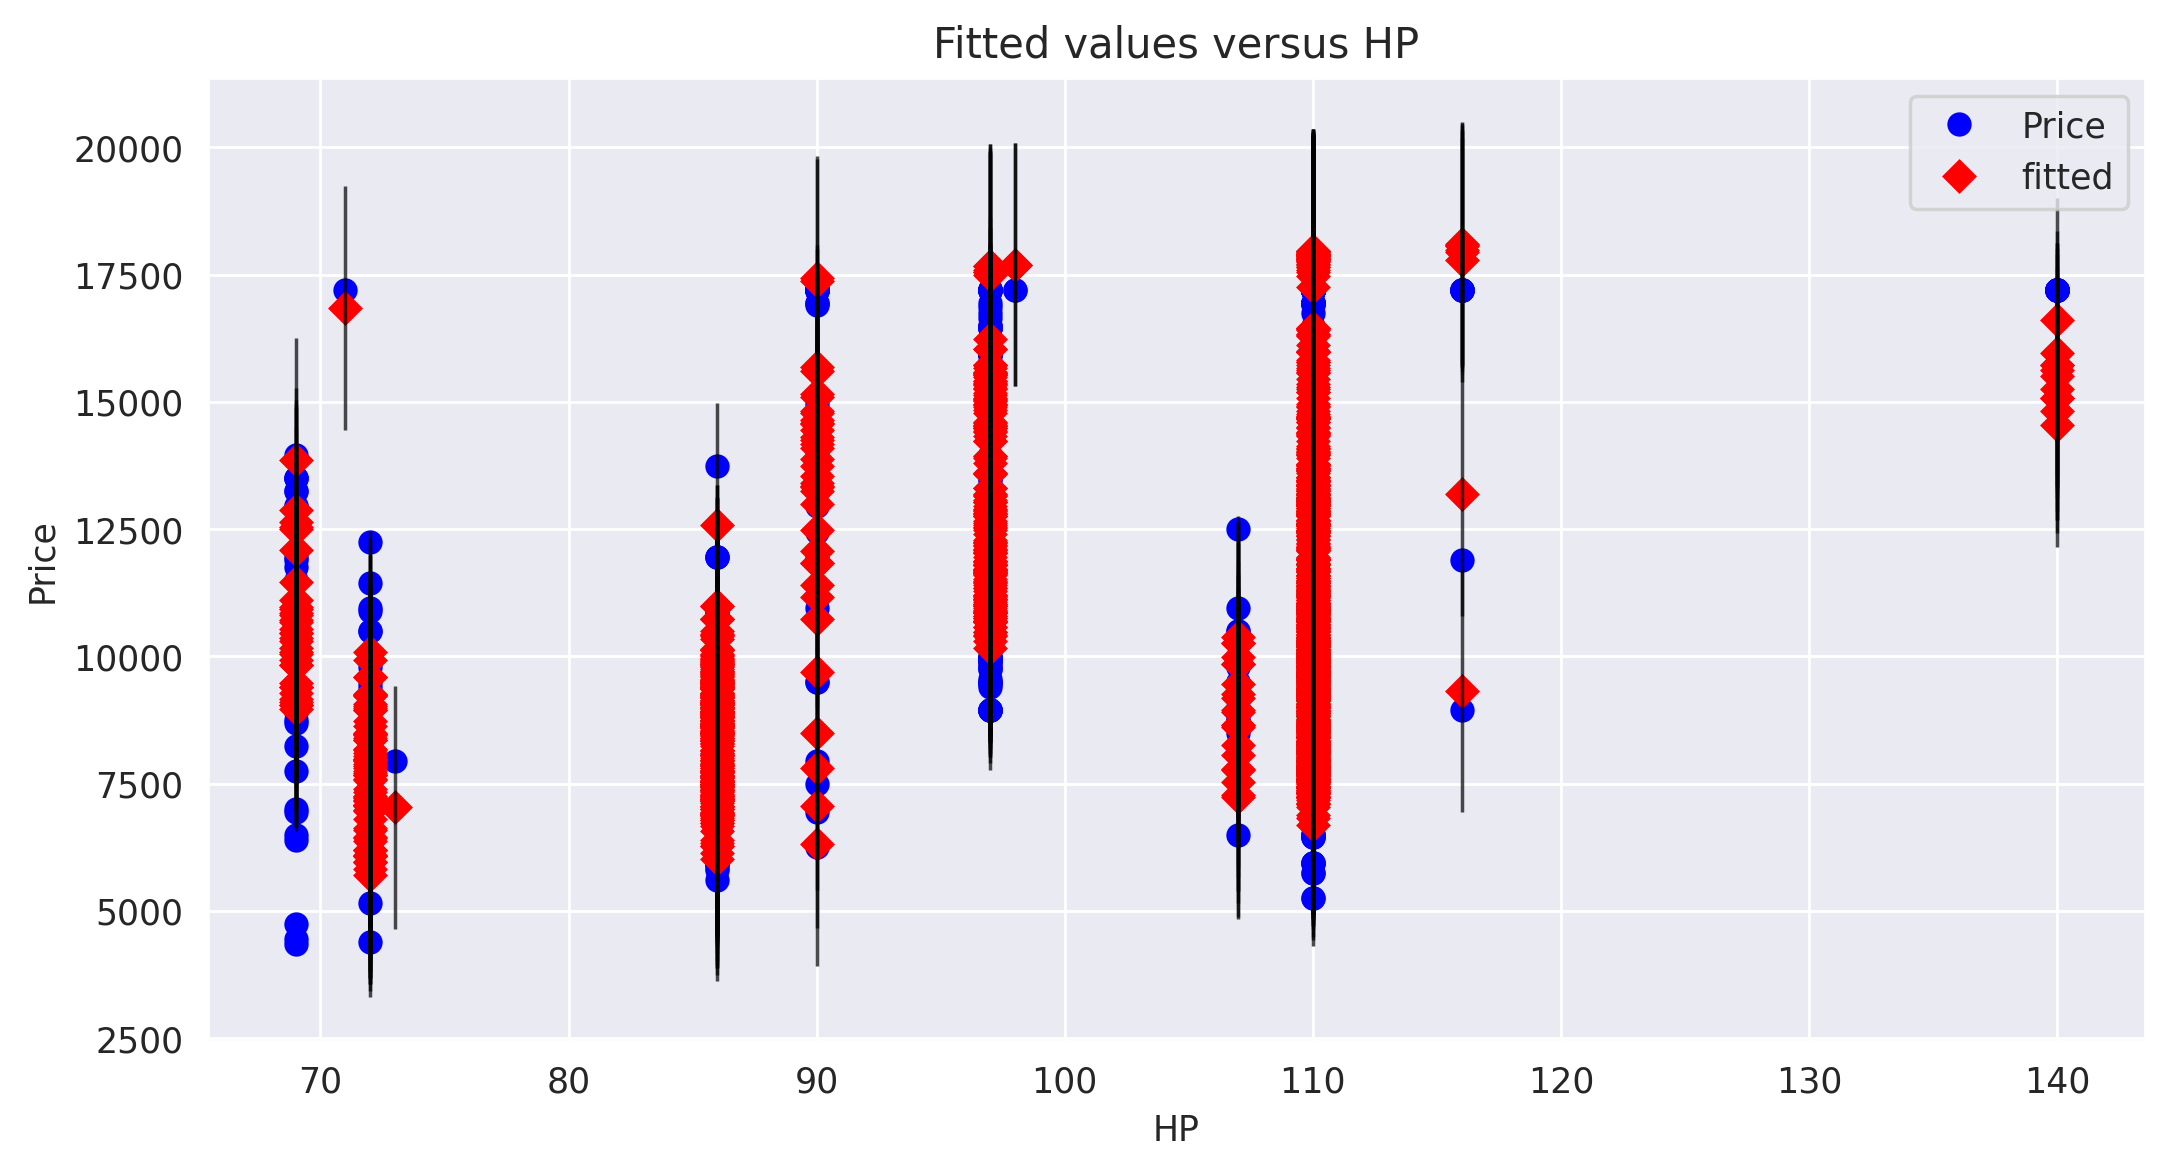

In [135]:
sm.graphics.plot_fit(model3,'HP');

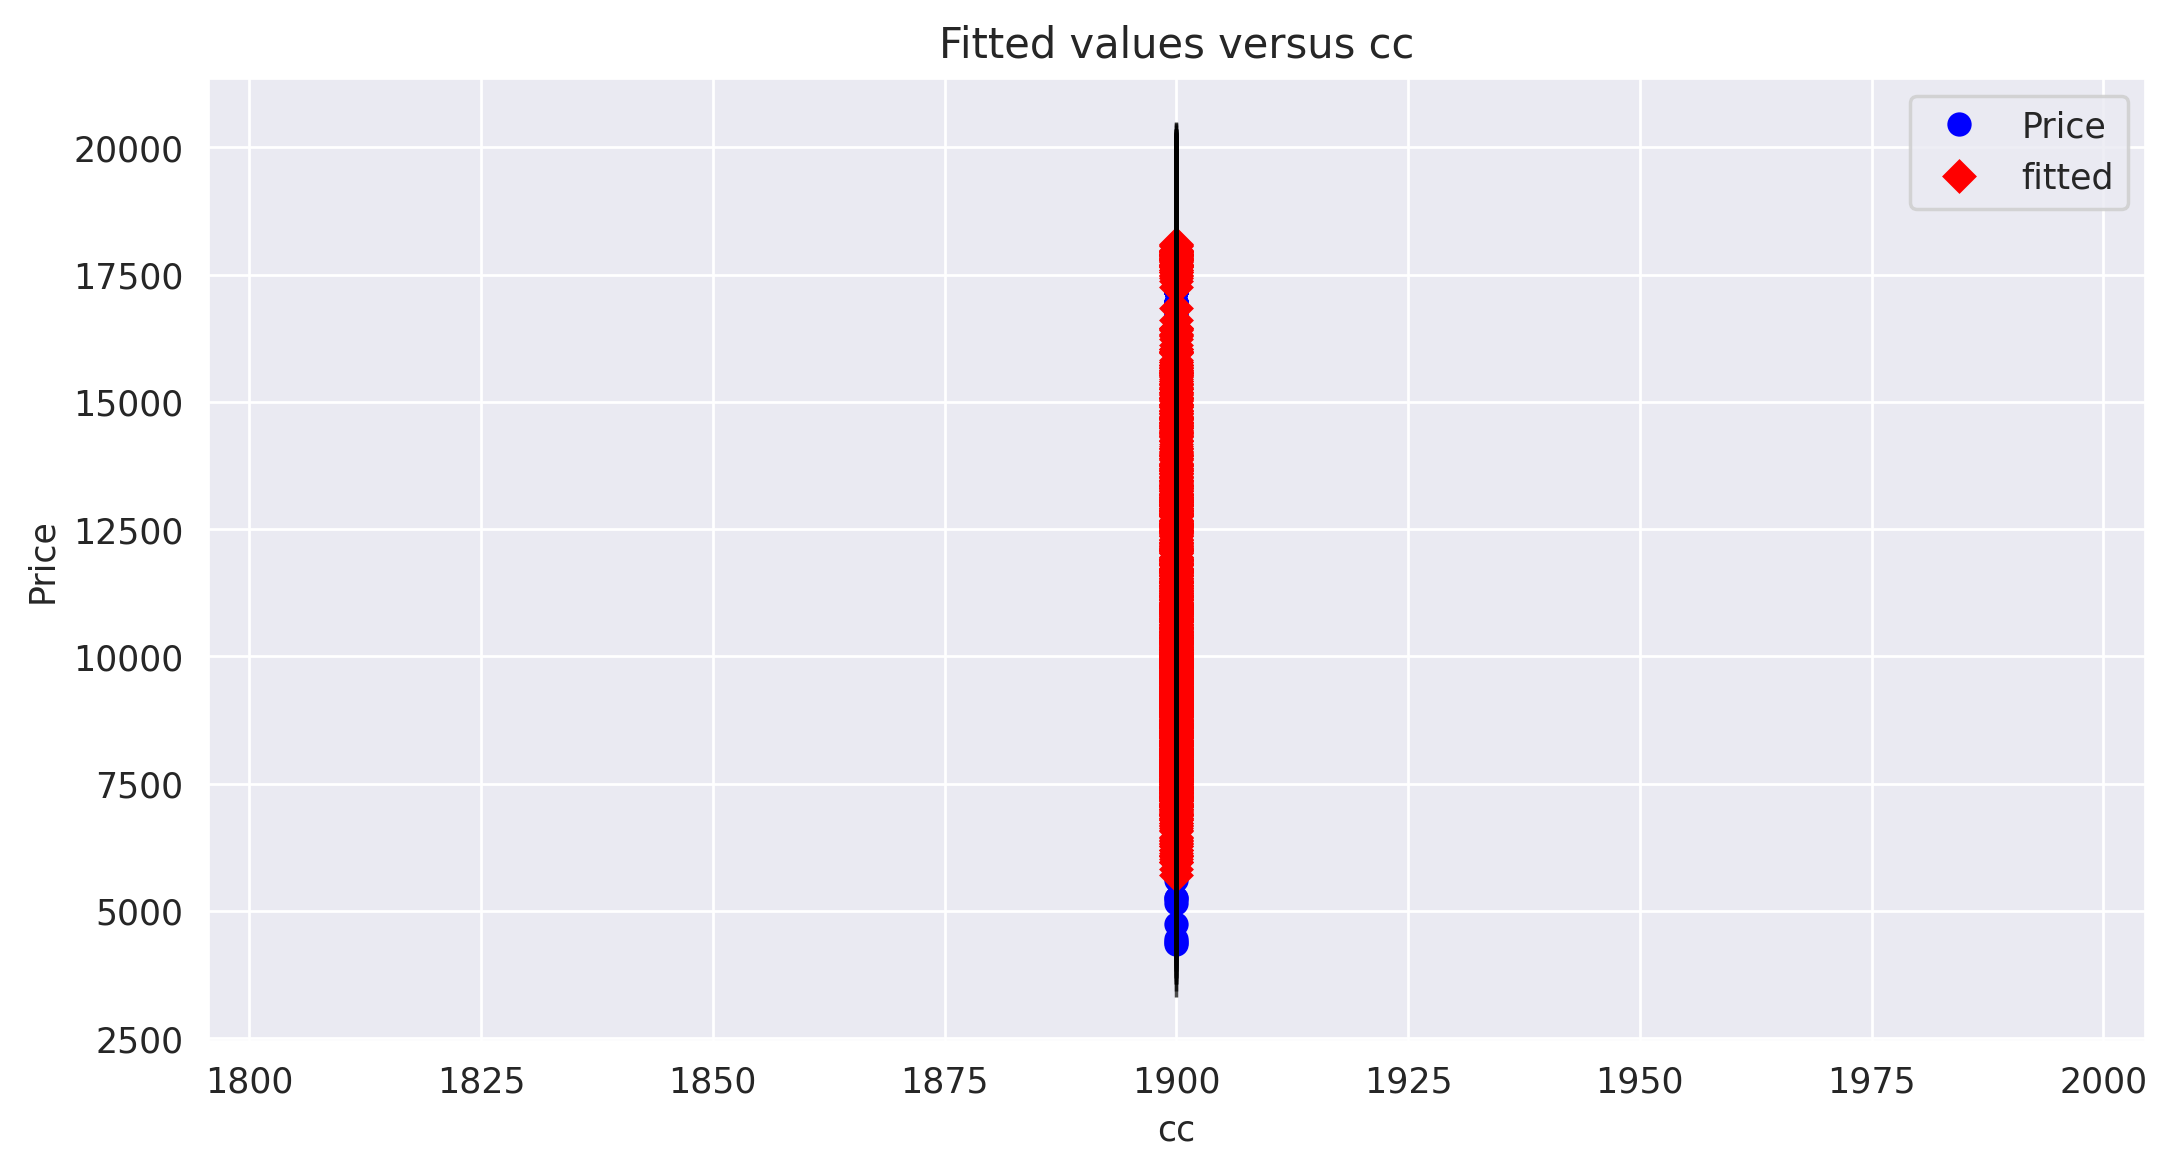

In [136]:
sm.graphics.plot_fit(model3,'cc');

3.model deletion technique

In [137]:
model3

In [138]:
inf=model3.get_influence()

In [139]:
# calculate the cook's distance
c,p = inf.cooks_distance

In [140]:
c

array([0.00064788, 0.00018929, 0.00019366, ..., 0.00013563, 0.00286777,
       0.00445842])

Text(0, 0.5, "Cook's Distance")

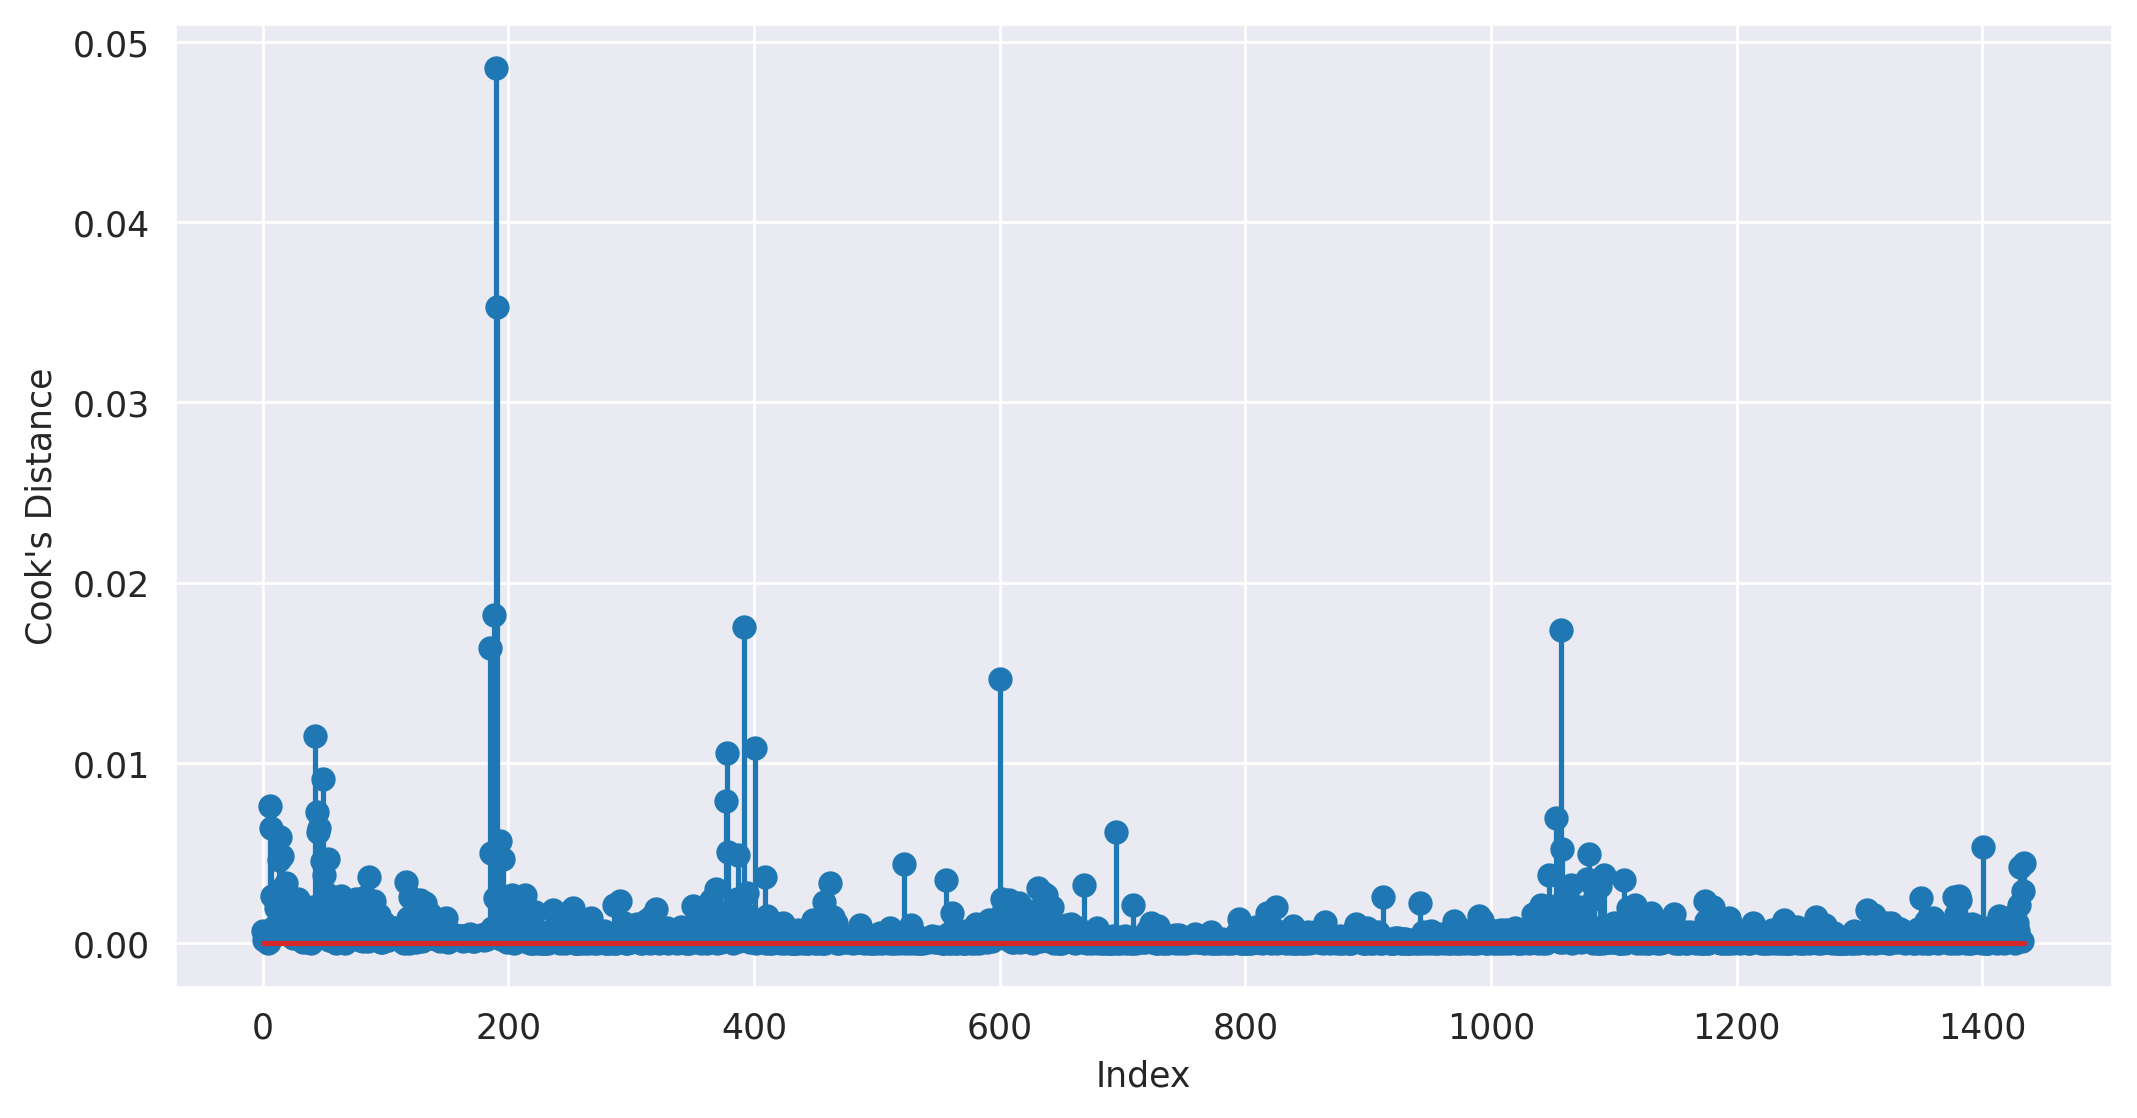

In [141]:
# Cook's distance plot
plt.stem(c)
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')

In [142]:
np.argmax(c),np.max(c) # row 190 is influencer so drop it

(190, 0.048551847287361505)

In [143]:
df.iloc[[190]]

Price  Age_08_04         KM  HP    cc  Doors  Weight
191   4350         44  153103.75  69  1900      5  1110.0

In [144]:
from statsmodels.graphics.regressionplots import influence_plot

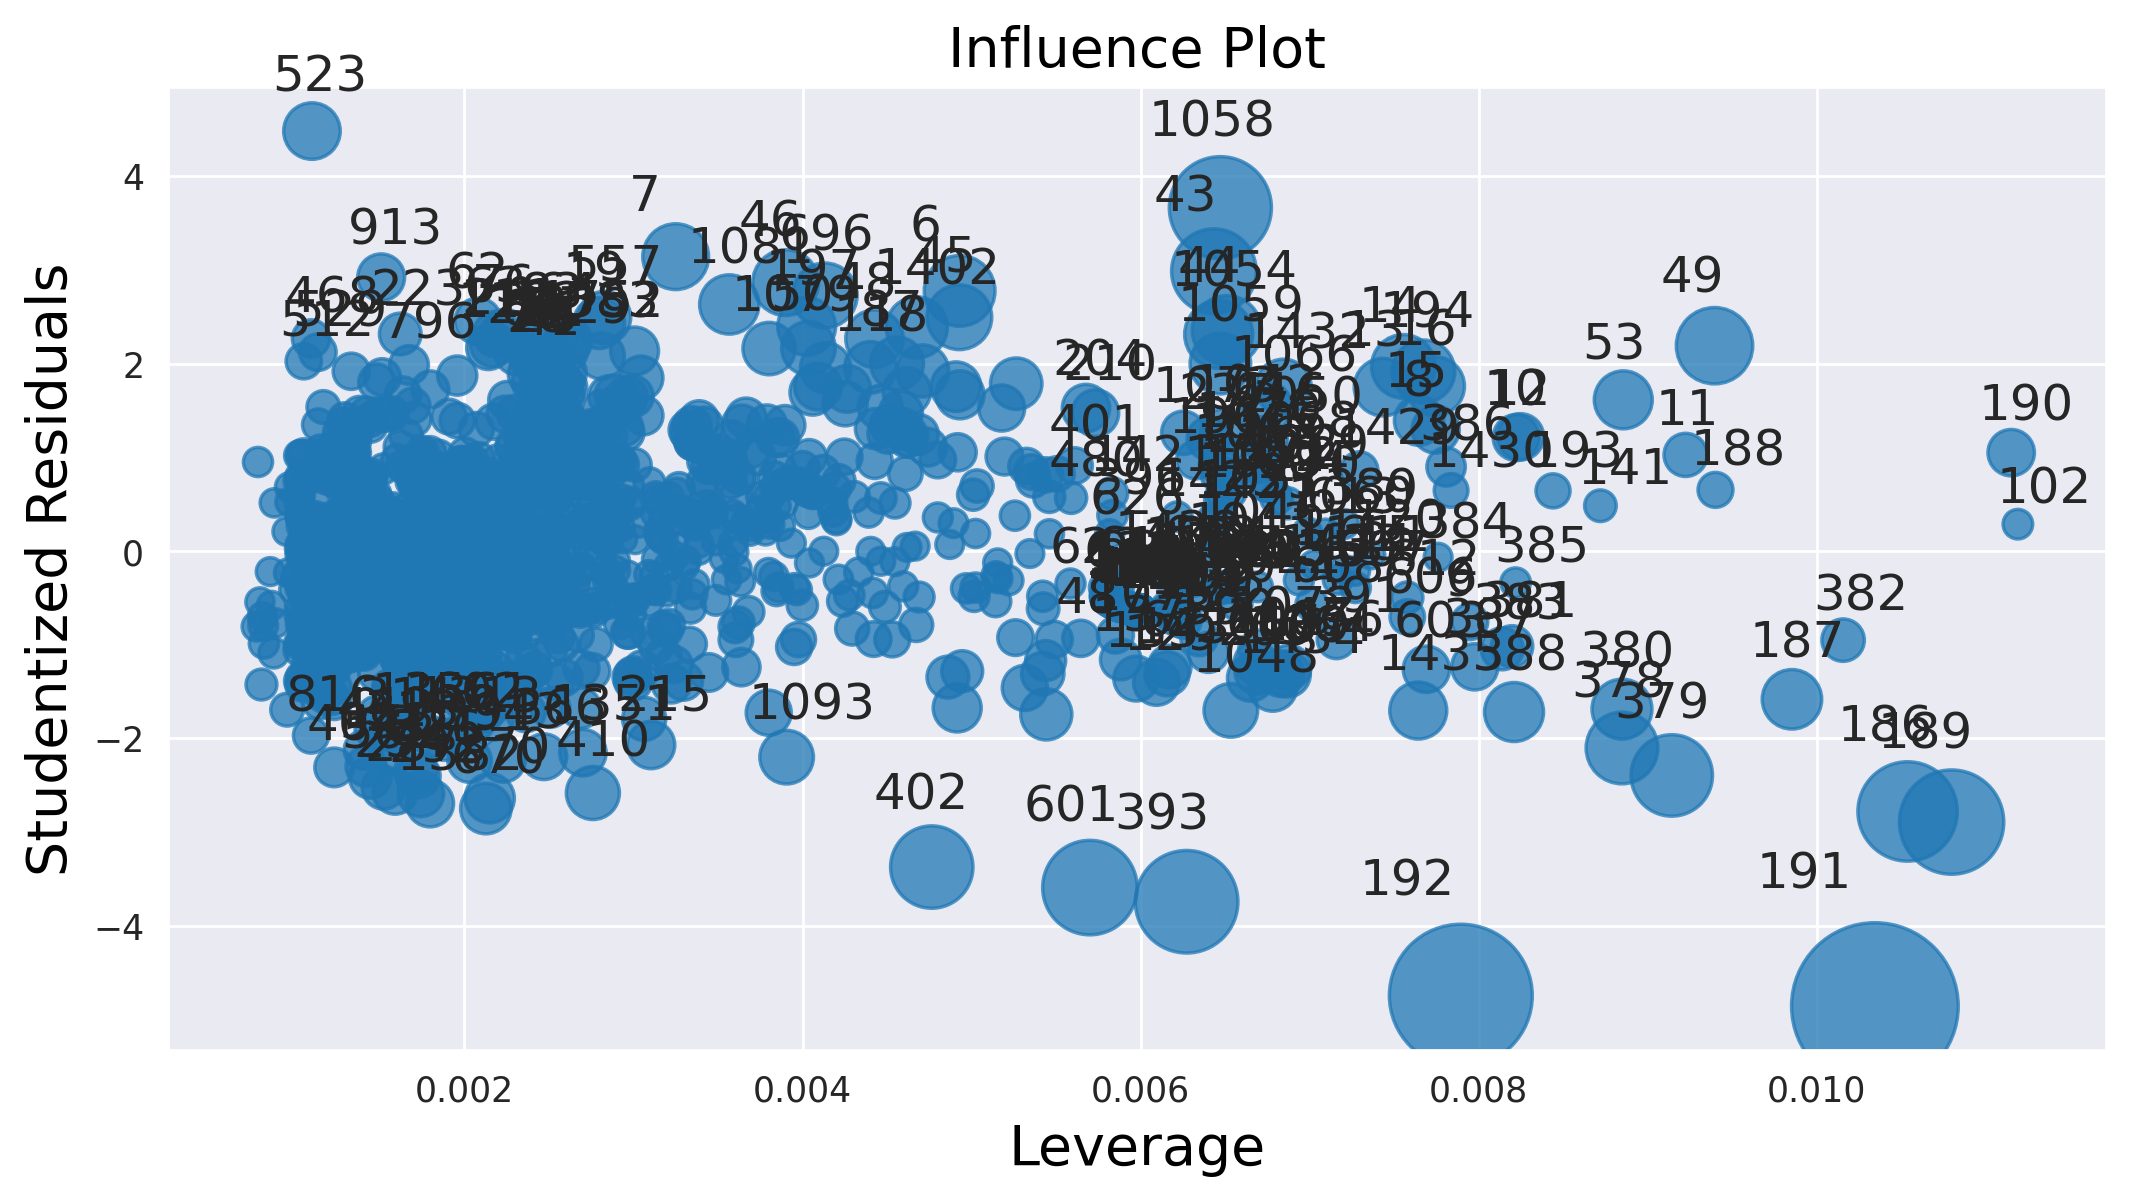

In [145]:
influence_plot(model3);

In [146]:
k = len(df.columns)
n = len(df)

leverage = 3*(k+1)/n
leverage

0.016724738675958188

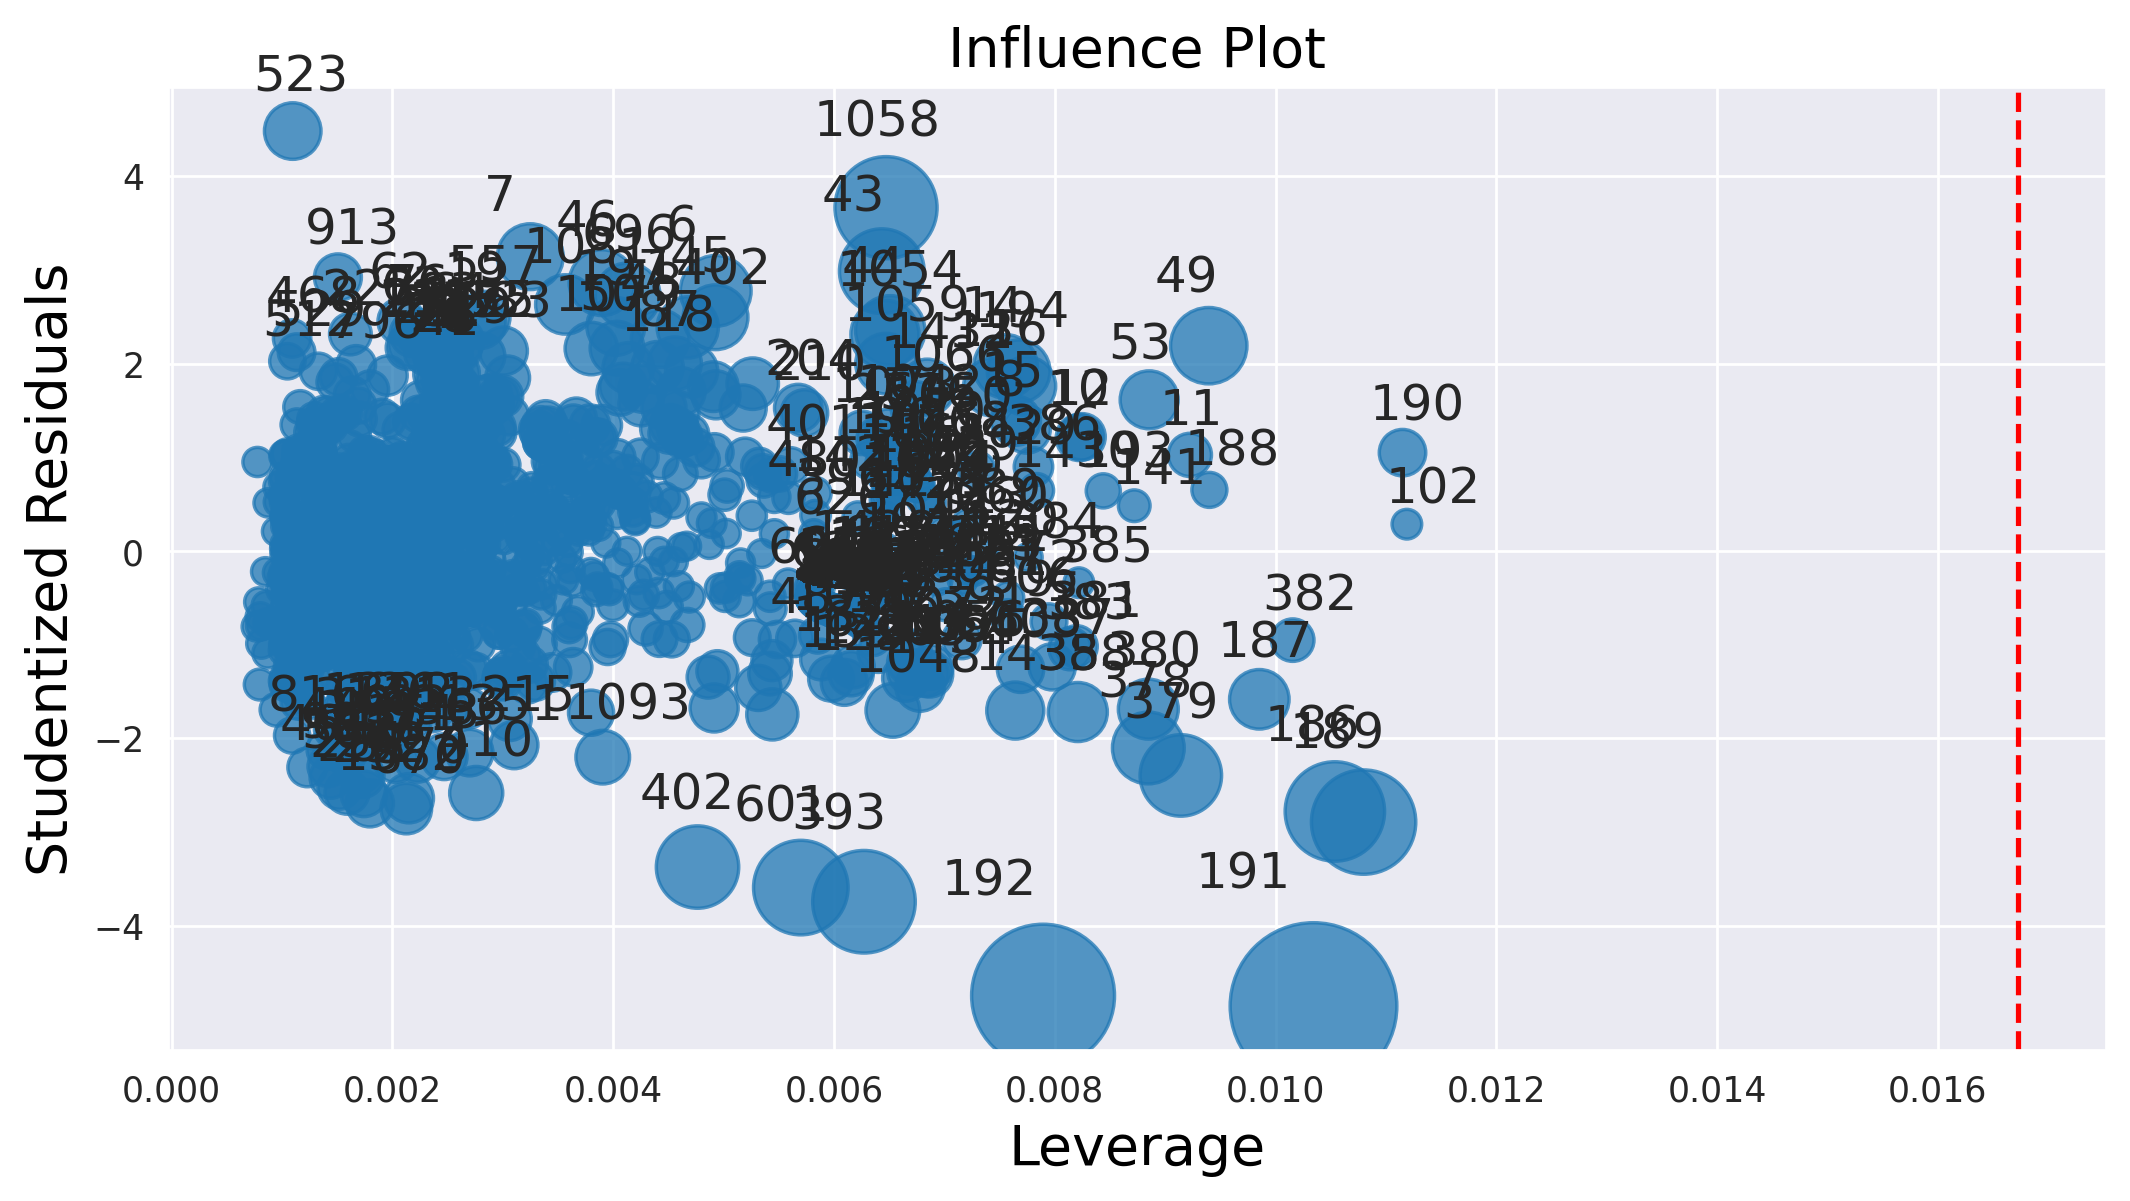

In [147]:
influence_plot(model3)
plt.axvline(leverage,linestyle='--',color = 'red')

Improving the model

In [148]:
df.drop(index=190,inplace=True)      #dropped the 190th record

In [149]:
df

Price  Age_08_04       KM   HP    cc  Doors  Weight
0     13500         23  46986.0   90  1900      3  1152.5
1     13750         23  72937.0   90  1900      3  1152.5
2     13950         24  41711.0   90  1900      3  1152.5
3     14950         26  48000.0   90  1900      3  1152.5
4     13750         30  38500.0   90  1900      3  1152.5
...     ...        ...      ...  ...   ...    ...     ...
1431   7500         69  20544.0   86  1900      3  1025.0
1432  10845         72  19000.0   86  1900      3  1015.0
1433   8500         71  17016.0   86  1900      3  1015.0
1434   7250         70  16916.0   86  1900      3  1015.0
1435   6950         76      1.0  110  1900      5  1114.0

[1434 rows x 7 columns]

In [150]:
final_model = smf.ols("Price ~ Age_08_04 + KM + HP + cc", data=df).fit()

In [151]:
final_model.rsquared

0.8339415296103622

predicting for new records (test )

In [157]:
df.head()

Price  Age_08_04       KM  HP    cc  Doors  Weight
0  13500         23  46986.0  90  1900      3  1152.5
1  13750         23  72937.0  90  1900      3  1152.5
2  13950         24  41711.0  90  1900      3  1152.5
3  14950         26  48000.0  90  1900      3  1152.5
4  13750         30  38500.0  90  1900      3  1152.5

In [159]:
test = pd.DataFrame({
    'Age_08_04':[25,30,50],
    'KM':[450000,460000,50000],
    'HP':[85,98,91],
    'cc':[1900,1900,1900]
})

In [160]:
test

Age_08_04      KM  HP    cc
0         25  450000  85  1900
1         30  460000  98  1900
2         50   50000  91  1900

In [161]:
final_model.params

Intercept      0.004453
Age_08_04   -126.074866
KM            -0.012741
HP            22.937151
cc             8.461435
dtype: float64

In [163]:
final_model.predict(test)

0     9140.957071
1     8681.353271
2    11223.205566
dtype: float64

ridge and lasso

In [152]:
from sklearn.linear_model import Lasso, Ridge

In [153]:
l1 = Lasso()
l1.fit(X_train,y_train)
l1.score(X_train,y_train),l1.score(X_test,y_test)

(0.8375915182100391, 0.8290818010361702)

In [154]:
l1.coef_

array([-1.23975409e+02, -1.33112777e-02,  2.33989134e+01,  0.00000000e+00,
        1.38710378e+02])

In [155]:
l2=Ridge()
l2.fit(X_train,y_train)
l2.score(X_train,y_train),l2.score(X_test,y_test)

(0.8375916410195212, 0.829093264406292)

In [156]:
l2.coef_

array([-1.23970728e+02, -1.33120672e-02,  2.33964693e+01,  0.00000000e+00,
        1.39696322e+02])

The main use of normalization is to utilize in order to remove anomalies that are caused because of the transitive dependency. Normalization is to minimize the redundancy and remove Insert, Update and Delete Anomaly. It divides larger tables into smaller tables and links them using relationships



To address multicollinearity, techniques such as regularization or feature selection can be applied to select a subset of independent variables that are not highly correlated with each other. In this article, we will focus on the most common one – VIF (Variance Inflation Factors).